## Analyzing the quality and gene expression profile of septal neurons

#### Import libraries

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
library(ggplot2)
library(xlsx)
library(tidyr)
library(ggplot2)
library(cowplot)
library(svglite)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union





Attaching package: 'tidyr'


The following object is masked from 'package:magrittr':

    extract




#### Load in .rds files from previous notebook

In [4]:
LS.integrated<-readRDS(file = "/LS_integrated.rds")

In [5]:
LS_sal<-readRDS(file = "/LS_sal.rds")
LS_mor<-readRDS(file = "/LS_mor.rds")
LS_nal<-readRDS(file = "/LS_nal.rds")
LS_one_mor<-readRDS( file = "/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "/LS_nal_no_mor.rds")

#### Assigning identities to each cell cluster

Need to normalize the RNA slot as we primarily used this version of the data to perform downstream analyses

In [6]:
LS.integrated <- NormalizeData(LS.integrated)

In [7]:
table(Idents(LS.integrated))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
3124 2731 2316 2248 2157 2116 2028 1919 1904 1860 1634 1015  437  118 

In [8]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [9]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [10]:
table(Idents(LS.integrated))


 Gaba1  Gaba2  Gaba3  Gaba4  Gaba5  Gaba6  Gaba7   Glu1  Gaba8  Gaba9 Gaba10 
  3124   2731   2316   2248   2157   2116   2028   1919   1904   1860   1634 
  Glu2 Gaba11 Gaba12 
  1015    437    118 

UMAP plot labeled by cell cluster

In [ ]:
mycols <- c('Gaba1'='#491822','Gaba11'='#672235','Gaba3'='#77283F','Gaba4'='#822B4F','Gaba6'='#8A2E6A','Gaba10'='#8D3091','Gaba7'='#6836A1','Gaba2'='#4939AC','Gaba5'='#3956AC','Gaba8'='#3988AC','Gaba9'='#3BB0AA','Gaba12'='#CACF6E','Glu1'='#6ECFA1','Glu2'='#99D685')

In [ ]:
my_cols2 <- mycols[order(as.integer(names(mycols)))]
scales::show_col(my_cols2)

In [ ]:
DimPlot(object = LS.integrated, cols=my_cols2, reduction = "umap", label = TRUE, repel = TRUE, pt.size = 0.25, label.size=4) +
theme_classic() + 
NoLegend() + 
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_names.pdf",width=3,height=3, units="in")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_names.png",width=3,height=3, units="in")

UMAP plot split by group

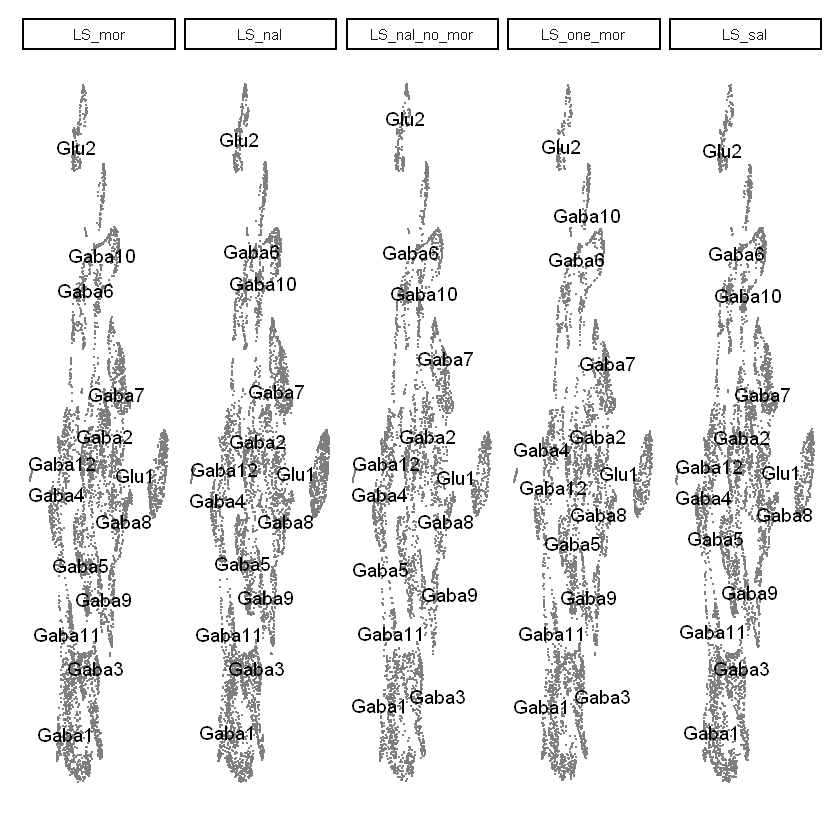

In [77]:
DimPlot(object = LS.integrated, cols=my_cols2, split.by='stim', reduction = "umap", label = TRUE, repel = TRUE, pt.size = 0.25, label.size=4) +
theme_classic() + 
NoLegend() + 
theme(plot.title=element_blank(),
     axis.line=element_blank(),
     axis.text=element_blank(),
     axis.title=element_blank(),
     axis.ticks=element_blank())
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_by_stim.pdf",width=15,height=3, units="in")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Neurons_by_stim.png",width=15,height=3, units="in")

Assigning cell cluster name to metadata

In [11]:
#creating vector of variable names
barcode_names <- unique(paste(Idents(LS.integrated),"_barcode",sep=""))

In [12]:
celltype<-vector()
for (i in 1:dim(LS.integrated@meta.data)[1]){
    celltype[i]<-toString(new.ident[LS.integrated@meta.data$integrated_snn_res.0.2[i]])
}
LS.integrated@meta.data$celltype<-celltype

In [13]:
table(LS.integrated@meta.data$celltype)


 Gaba1 Gaba10 Gaba11 Gaba12  Gaba2  Gaba3  Gaba4  Gaba5  Gaba6  Gaba7  Gaba8 
  3124   1634    437    118   2731   2316   2248   2157   2116   2028   1904 
 Gaba9   Glu1   Glu2 
  1860   1919   1015 

In [ ]:
table(Idents(LS.integrated))

In [ ]:
str(LS.integrated)

#### Quality metrics across cell types

Cell counts in each cluster

In [ ]:
Cells_in_clusters <- as.data.frame(table(Idents(LS.integrated)))

In [ ]:
colnames(Cells_in_clusters)[1] <- "Cluster"
colnames(Cells_in_clusters)[2] <- "Number"

In [ ]:
Cells_in_clusters$Cluster <- factor(Cells_in_clusters$Cluster, levels = c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12"))

In [ ]:
Cells_in_clusters$Cluster <- factor(Cells_in_clusters$Cluster, levels = c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

In [ ]:
#group.colors <- c(LS_sal="#23bbef",LS_mor="#fc8b84", LS_nal="#21d936")
p <- ggplot(data=Cells_in_clusters, aes (x=Cluster, y=Number)) +
geom_bar(stat="identity", position="identity") +
scale_y_continuous(breaks = seq(0, 3500, by = 500), limits=c(0,3500), expand = c(0, 0))+
theme_classic() +
theme(axis.line = element_line(color="black",size=0.1), axis.title.x= element_blank(), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8, ) ,plot.title=element_text(size=11)) +
theme(legend.title = element_text(size = 10),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))+
ggtitle("Number of cells in each group") +
expand_limits(x = 0, y = 0) 
#scale_fill_manual(values=group.colors)
p

#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/quality_control/no_cells_per_cluster_reordered.png",width=3,height=1)
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/quality_control/no_cells_per_cluster_reordered.pdf",width=3,height=1)

Mito reads vs UMIs by group

In [ ]:
DefaultAssay(LS.integrated) <- 'RNA'

In [ ]:
mito.features <- grep(pattern = "^mt-", x = rownames(x =LS.integrated), value = TRUE)
percent.mito <- Matrix::colSums(x = GetAssayData(object = LS.integrated, slot = 'counts')[mito.features, ]) / Matrix::colSums(x = GetAssayData(object = LS.integrated, slot = 'counts'))*100
LS.integrated[['percent.mito']] <- percent.mito

In [ ]:
group.colors <- c(LS_sal="lightgray",LS_one_mor="#29D6C2",LS_mor="#6C29D6", LS_nal_no_mor="#D6293D",LS_nal="#93D629")

In [ ]:
FeatureScatter(LS.integrated,feature1 = "nCount_RNA", feature2 = "percent.mito", group.by="stim", pt.size=0.5) + theme_classic() + 
ggtitle("Percent mito reads vs nCountRNA")+
theme(legend.position=c(0.85,0.85)) +
    theme(axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_text(size=6),
         axis.title=element_text(size=8),
         axis.text.y=element_text(angle=90, hjust=.5),
         plot.title=element_text(size=10)) +    
scale_color_manual(values = group.colors)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/percentmito_vs_nCountRNA.png",width=4,height=4)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/percentmito_vs_nCountRNA.pdf",width=4,height=4)

In [ ]:
new.ident <- c("Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron","Neuron")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [ ]:
nCounts <- LS.integrated@meta.data$nCount_RNA
nFeatures <- LS.integrated@meta.data$nFeature_RNA
mito <- LS.integrated@meta.data$percent.mito

all <- data.frame(counts = nCounts, features = nFeatures, percent.mito = mito)

ggplot(all, aes(x = nCounts, y = percent.mito)) +
    geom_point(color="orange", size=0.5) +
    theme_classic()+
     theme(axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_text(size=6),
           axis.text.y=element_text(angle=90, hjust=0.5),
         axis.title=element_text(size=8))+
    scale_x_continuous(expand = c(0, 0), limits=c(0,20000)) + 
    scale_y_continuous(expand = c(0, 0), limits=c(0,0.1))+
    xlab("UMIs")+
    ylab("Mito read enrichment (%)")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/percent.mito_scatter_neurons.pdf",width=2,height=2, units="in")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/percent.mito_scatter_neurons.png",width=2,height=2, units="in")

In [ ]:
RNA <- ggplot(all, aes(x = "nCounts",y=nCounts)) +
    geom_violin(fill="orange", size=0.25) +
    theme_classic() +
    stat_summary(fun.y=median, geom="point", size=0.25, color="white") +
    theme(axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_text(size=6),
         axis.title=element_text(size=6),
         axis.title.x=element_blank(),
         axis.text.y=element_text(size=6, hjust=.5))+
        ylim(c(0,20000)) +
        ylab("UMI counts") +
        xlab("Neurons only")
ggsave(RNA, file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/nCount_vln_neurons.pdf",width=0.75,height=0.85)
ggsave(RNA, file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/nCount_vln_neurons.png",width=0.75,height=0.85)

Genes <- ggplot(all, aes(x = "nFeatures",y=nFeatures)) +
    geom_violin(fill="orange", size=0.25) +
    theme_classic() +
    stat_summary(fun.y=median, geom="point", size=0.25, color="white") +
    theme(axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_text(size=6),
         axis.title=element_text(size=8),
         axis.title.x=element_blank(),
         axis.text.y=element_text(size=6, hjust=.5))+
        ylim(c(0,6000)) +
        ylab("Gene counts") +
        xlab("Neurons only")
ggsave(Genes, file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/nFeature_vln_neurons.pdf",width=0.75,height=0.85)
ggsave(Genes, file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/nFeature_vln_neurons.png",width=0.75,height=0.85)

Mito <- ggplot(all, aes(x = "percent mito",y=percent.mito)) +
    geom_violin(fill="orange", size=0.25) +
    theme_classic() +
    stat_summary(fun.y=median, geom="point", size=0.25, color="white") +
    theme(axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_text(size=6),
         axis.title=element_text(size=6),
         axis.title.x=element_blank(),
         axis.text.y=element_text(size=6, hjust=.5))+        
        ylim(c(0,1)) +
        ylab("Mito read enrichment (%)") +
        xlab("Neurons only")
ggsave(Mito, file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/percent.mito_vln_neurons.pdf",width=0.75,height=0.85)
ggsave(Mito, file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Quality_control/percent.mito_vln_neurons.png",width=0.75,height=0.85)

Proportion of cells in each group

In [10]:
subset <- as.data.frame(table(Idents(LS.integrated)))
cluster_numbers<- subset[2]

In [11]:
subset <- rep(array(unlist(cluster_numbers)),5)

In [12]:
cluster_by_group <- as.data.frame(table(Idents(LS.integrated), LS.integrated$stim))
colnames(cluster_by_group) <- c("Cluster","Group","Cells")
cluster_by_group$Total <- subset

In [13]:
cluster_by_group <- transform(cluster_by_group, prop = Cells/Total)

In [14]:
cluster_by_group$Cluster<-factor(cluster_by_group$Cluster, levels=c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Gaba8","Gaba9","Gaba10","Gaba11","Gaba12",'Glu1',"Glu2"))

In [ ]:
cluster_by_group$Cluster<-factor(cluster_by_group$Cluster, levels=c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

In [22]:
cluster_by_group$Group <- factor(cluster_by_group$Group, levels = (c("LS_sal", "LS_mor","LS_nal","LS_one_mor","LS_nal_no_mor")), ordered=TRUE)

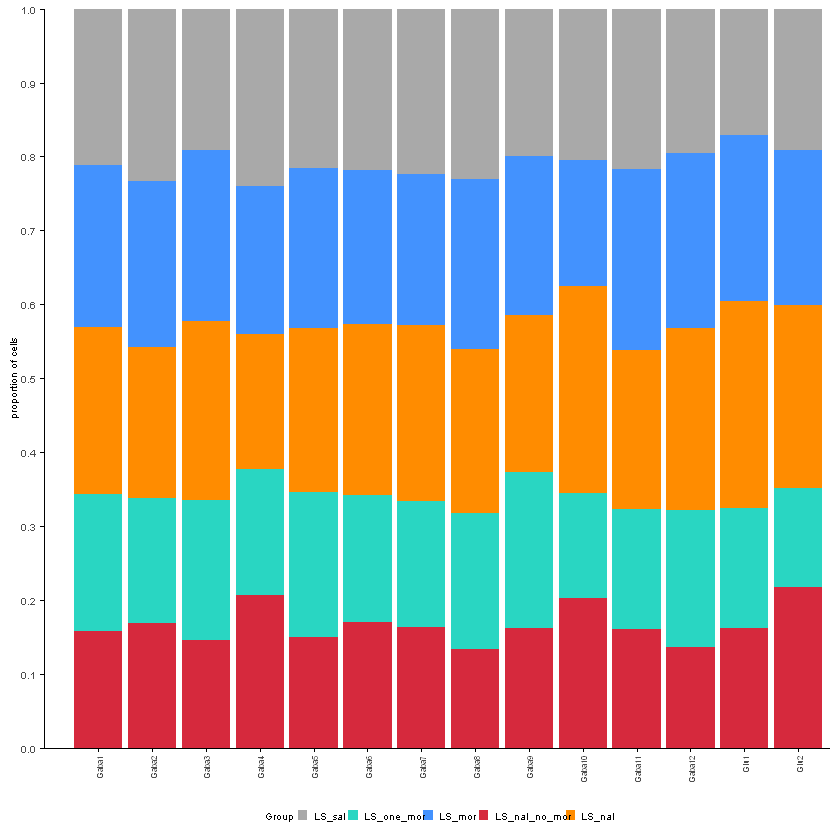

In [23]:
group.colors <- c(LS_sal="darkgray",LS_one_mor="#29D6C2",LS_mor="#4392FE", LS_nal_no_mor="#D6293D",LS_nal="darkorange")
p <- ggplot(data=cluster_by_group, aes (x=Cluster, y=prop, fill=Group)) +
    geom_bar(stat="identity", position="stack") +
    scale_y_continuous(breaks = seq(0, 1, by = .1), limits=c(0,1), expand = c(0, 0))+
    theme_classic() +
    theme(axis.line = element_line(color="black",size=0.25), 
          axis.text.y=element_text(size=6),
          axis.title.x = element_blank(), 
          axis.title.y = element_text(size=6),
          axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=5, ) ,
          plot.title=element_blank()) +
    theme(legend.position='bottom',
          legend.title = element_text(size = 6),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25),
         legend.key.size = unit(0.1, "in"))+
    ggtitle("Proportion of cells") +
    expand_limits(x = 0, y = 0) +
    scale_fill_manual(values=group.colors)+
    ylab("proportion of cells")

#ggsave(file="prop_of_group_per_cluster.pdf",width=2,height=2)
#ggsave(file="quality_control/prop_of_group_per_cluster.png",height=2,width=2)
p

#### UMI and gene plots

In [33]:
wanted_col <- c("celltype","stim","nCount_RNA","nFeature_RNA","percent.mito")

In [34]:
subset <- as.data.frame(LS.integrated@meta.data[,wanted_col])

In [35]:
col <- vector(mode="numeric", length=0)
for (i in 1:length(subset$celltype)){
    if (subset$stim[i]=="LS_sal"){col[i]<- "lightgray"}
    else if (subset$stim[i]=="LS_one_mor"){col[i]<- "#29D6C2"}
    else if (subset$stim[i]=="LS_mor"){col[i]<- "#6C29D6"}
    else if (subset$stim[i]=="LS_nal_no_mor"){col[i]<- "#D6293D"}
    else if (subset$stim[i]=="LS_nal"){col[i]<- "#93D629"}
}
subset$col <- col

In [36]:
subset$stim <- factor(subset$stim, levels=c("LS_sal","LS_mor","LS_nal","LS_one_mor","LS_nal_no_mor"))

In [37]:
subset$celltype <- factor(subset$celltype, levels=c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

In [38]:
subset$celltype <- factor(subset$celltype, levels=c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Gaba8","Gaba9","Gaba10","Gaba11","Gaba12","Glu1","Glu2"))

In [39]:
subset

,celltype,stim,nCount_RNA,nFeature_RNA,percent.mito,col
,<fct>,<fct>,<dbl>,<int>,<dbl>,<chr>
AAACGCTCAGGCACAALS_sal,Gaba2,LS_sal,4968,2491,0.0002012882,lightgray
AAAGAACCAGCAGATGLS_sal,Gaba2,LS_sal,1516,1004,0.0006596306,lightgray
AAAGAACGTCCGAAAGLS_sal,Gaba2,LS_sal,5914,2766,0.0003381806,lightgray
AAAGGATGTGTTTCTTLS_sal,Gaba2,LS_sal,4910,2580,0.0006109980,lightgray
AACAAAGGTTTGTTCTLS_sal,Gaba2,LS_sal,7893,3257,0.0003800836,lightgray
AACACACCAGAGAAAGLS_sal,Gaba2,LS_sal,5457,2584,0.0001832509,lightgray
AACAGGGCATCGAACTLS_sal,Gaba2,LS_sal,4697,2350,0.0002129019,lightgray
AACCACAAGCAGCCTCLS_sal,Gaba2,LS_sal,6891,3142,0.0014511682,lightgray
AACCACATCAGGACAGLS_sal,Gaba2,LS_sal,7591,3194,0.0000000000,lightgray


In [40]:
pu <- ggplot(subset, aes(x=celltype, y=nCount_RNA, color=celltype, fill=celltype)) + 
    geom_violin(width=0.75, size=0.25) +
    stat_summary(fun.y=median, geom="point", size=0.25, color="white")+
    theme_classic()+
    theme(axis.line = element_line(color="black",size=0.1),
          axis.text.y=element_text(size=6) ,
          axis.text.x=element_text(hjust=1, size=6, angle=45),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),
          plot.title=element_blank()) +
    theme(legend.title = element_text(size = 8),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25))+
    ggtitle("UMI counts by group") +
    scale_fill_manual(values = my_cols2)+
    scale_color_manual(values = rep('black', 14))+
    NoLegend()
pu
#ggsave(file="UMIs_by_celltype.pdf",width=2.5,height=1)
#ggsave(file="UMIs_by_celltype.png",width=2.5,height=1)

Warning message:
"`fun.y` is deprecated. Use `fun` instead."


ERROR: Error in is_reference(x, quote(expr = )): object 'my_cols2' not found


Warning message:
"`fun.y` is deprecated. Use `fun` instead."


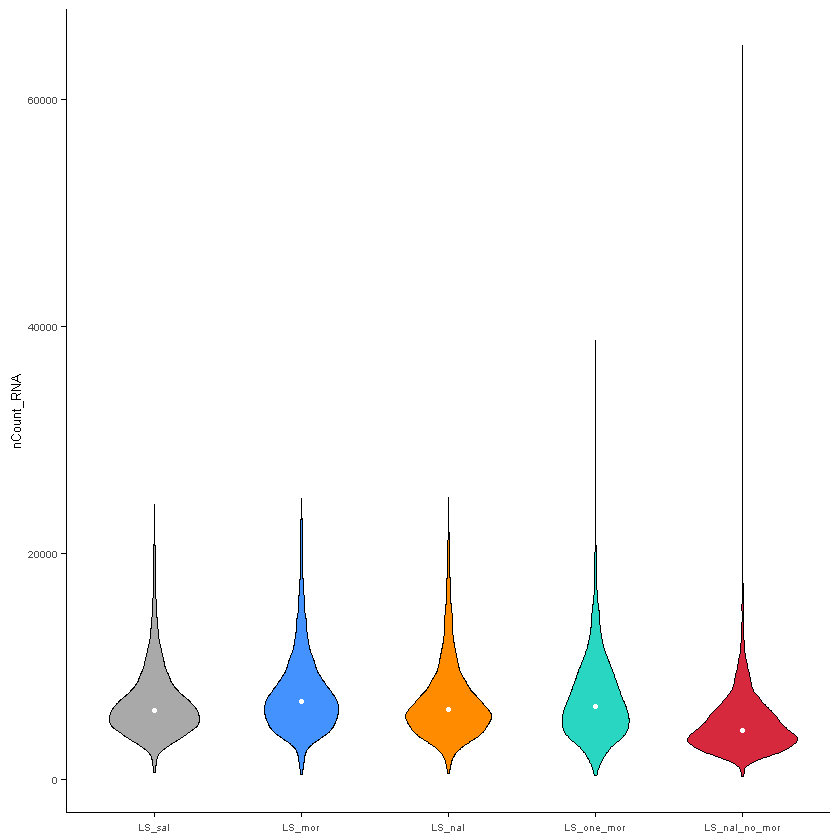

In [41]:
group.colors <- c(LS_sal="darkgray",LS_one_mor="#29D6C2",LS_mor="#4392FE", LS_nal_no_mor="#D6293D",LS_nal="darkorange")
pu <- ggplot(subset, aes(x=stim, y=nCount_RNA, color=stim, fill=stim)) + 
    geom_violin(width=0.75, size=0.25) +
    stat_summary(fun.y=median, geom="point", size=1, color="white")+
    theme_classic()+
    theme(axis.line = element_line(color="black",size=0.1),
          axis.text.y=element_text(size=6) ,
          axis.text.x=element_text(vjust=0.5, size=6),
          axis.title.x=element_blank(),
          axis.title.y=element_text(size=8),
          plot.title=element_blank()) +
    theme(legend.title = element_text(size = 6),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25))+
    ggtitle("UMI counts by group") +
    scale_fill_manual(values = group.colors)+
    scale_color_manual(values = c("black","black","black","black","black"))+
    NoLegend()
pu
#ggsave(file="UMIs_by_group_combined.pdf",width=1,height=1)
#ggsave(file="UMIs_by_group_combined.png",width=1,height=1)

Warning message:
"`fun.y` is deprecated. Use `fun` instead."


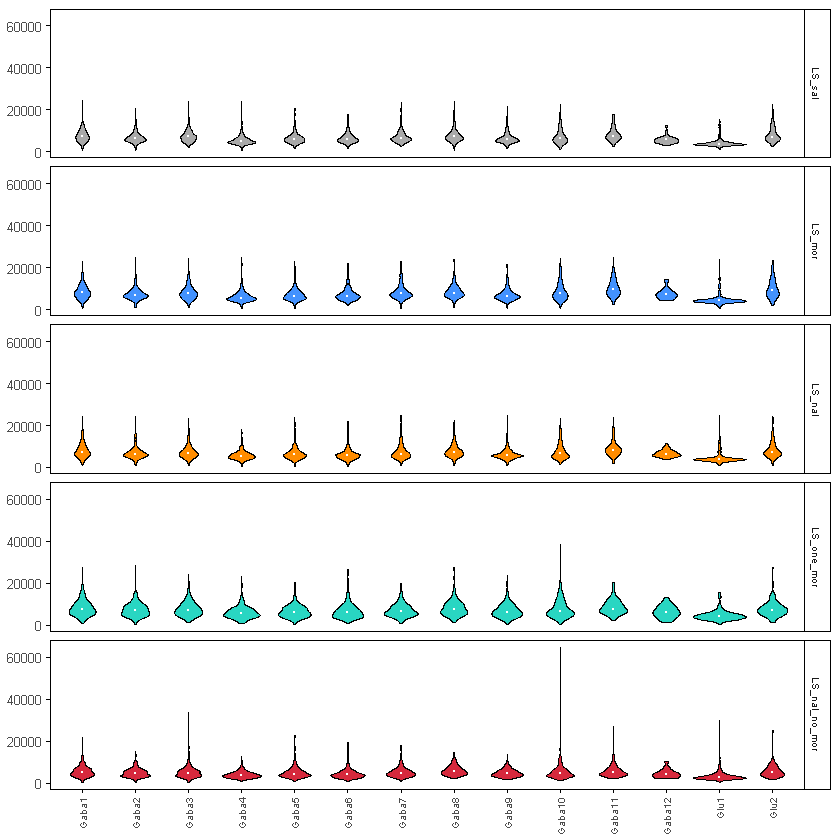

In [42]:
pu <- ggplot(subset, aes(x=celltype, y=nCount_RNA, fill=stim, color=stim,)) + 
geom_violin(width=1, size=0.25) +
stat_summary(fun.y=median, geom="point", size=0.25, color="white")+
theme_classic()+
theme(axis.line = element_line(color="black",size=0.1), 
      axis.text.y=element_text(size=8) ,
      axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=6) ,
      plot.title=element_blank(),
      axis.title=element_blank()) +
theme(legend.title = element_text(size = 11),legend.text = element_text(size = 6), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))+
ggtitle("UMI counts by group") +
scale_fill_manual(values = group.colors)+
scale_color_manual(values = c("black","black","black","black","black"))
pu + facet_grid(rows = vars(subset$stim)) + NoLegend() +
theme(strip.background = element_rect(color="black", size=0.25, linetype="solid"), strip.text.y = element_text(size = 6),
      panel.background = element_rect(colour = "black", size=.5, fill=NA))
#ggsave(file="UMIs_by_group.png",width=3,height=3)
#ggsave(file="UMIs_by_group.pdf",width=3,height=3)

In [43]:
pg <- ggplot(subset, aes(x=celltype, y=nFeature_RNA, color=celltype, fill=celltype)) + 
    geom_violin(width=0.75, size=0.25) +
    stat_summary(fun.y=median, geom="point", size=0.25, color="white")+
    theme_classic()+
    theme(axis.line = element_line(color="black",size=0.1),
           axis.title.x=element_blank(),
          axis.text.y=element_text(size=6) ,
            axis.title.y=element_blank(),
          axis.text.x=element_text( hjust=1,angle=45, size=6),
          plot.title=element_blank()) +
    theme(legend.title = element_text(size = 8),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25))+
    ggtitle("UMI counts by group") +
    scale_fill_manual(values = my_cols2)+
    scale_color_manual(values = rep('black',14))+
    NoLegend()
pg
#ggsave(file="Genes_by_celltype.pdf",width=2.5,height=1)
#ggsave(file="Genes_by_celltype.png",width=2.5,height=1)

Warning message:
"`fun.y` is deprecated. Use `fun` instead."


ERROR: Error in is_reference(x, quote(expr = )): object 'my_cols2' not found


Warning message:
"`fun.y` is deprecated. Use `fun` instead."


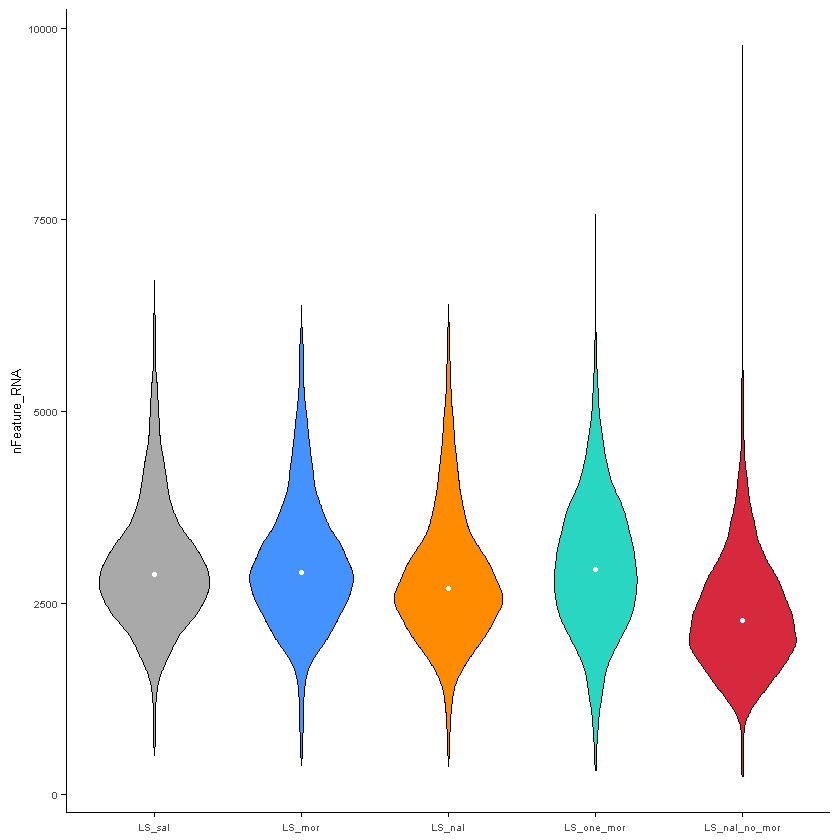

In [44]:
group.colors <- c(LS_sal="darkgray",LS_one_mor="#29D6C2",LS_mor="#4392FE", LS_nal_no_mor="#D6293D",LS_nal="darkorange")
pg <- ggplot(subset, aes(x=stim, y=nFeature_RNA, color=stim, fill=stim)) + 
    geom_violin(width=0.75, size=0.25) +
    stat_summary(fun.y=median, geom="point", size=1, color="white")+
    theme_classic()+
    theme(axis.line = element_line(color="black",size=0.1),
           axis.title.x=element_blank(),
          axis.text.y=element_text(size=6) ,
            axis.title.y=element_text(size=8),
          axis.text.x=element_text( vjust=0.5, size=6),
          plot.title=element_blank()) +
    theme(legend.title = element_text(size = 6),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25))+
    ggtitle("UMI counts by group") +
    scale_fill_manual(values = group.colors)+
    scale_color_manual(values = c("black","black","black","black","black"))+
    NoLegend()
pg
#ggsave(file="Genes_by_group_combined.pdf",width=1,height=1)
#ggsave(file="Genes_by_group_combined.png",width=1,height=1)

In [62]:
subset

,celltype,stim,nCount_RNA,nFeature_RNA,percent.mito,col
,<fct>,<fct>,<dbl>,<int>,<dbl>,<chr>
AAACGCTCAGGCACAALS_sal,Gaba2,LS_sal,4968,2491,0.0002012882,lightgray
AAAGAACCAGCAGATGLS_sal,Gaba2,LS_sal,1516,1004,0.0006596306,lightgray
AAAGAACGTCCGAAAGLS_sal,Gaba2,LS_sal,5914,2766,0.0003381806,lightgray
AAAGGATGTGTTTCTTLS_sal,Gaba2,LS_sal,4910,2580,0.0006109980,lightgray
AACAAAGGTTTGTTCTLS_sal,Gaba2,LS_sal,7893,3257,0.0003800836,lightgray
AACACACCAGAGAAAGLS_sal,Gaba2,LS_sal,5457,2584,0.0001832509,lightgray
AACAGGGCATCGAACTLS_sal,Gaba2,LS_sal,4697,2350,0.0002129019,lightgray
AACCACAAGCAGCCTCLS_sal,Gaba2,LS_sal,6891,3142,0.0014511682,lightgray
AACCACATCAGGACAGLS_sal,Gaba2,LS_sal,7591,3194,0.0000000000,lightgray


Warning message:
"`fun.y` is deprecated. Use `fun` instead."


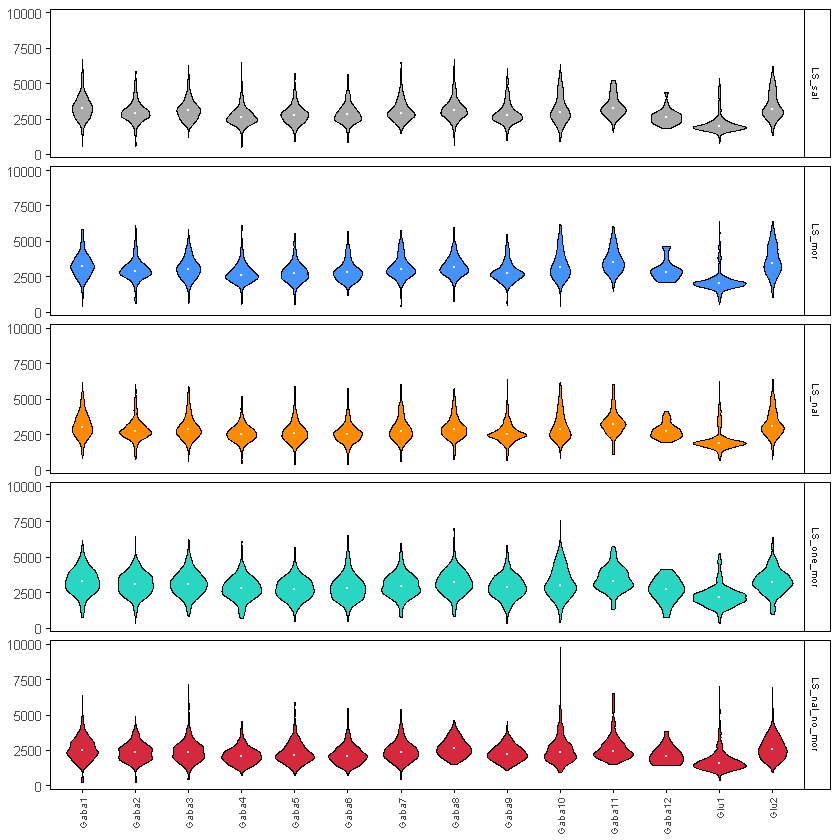

In [45]:
pg <- ggplot(subset, aes(x=celltype, y=nFeature_RNA, fill=stim, color=stim,)) + 
geom_violin(width=1, size=0.25) +
stat_summary(fun.y=median, geom="point", size=0.25, color="white")+
theme_classic()+
theme(axis.line = element_line(color="black",size=0.1), 
      axis.text.y=element_text(size=8) ,
      axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=6) ,
      plot.title=element_blank(),
      axis.title=element_blank()) +
theme(legend.title = element_text(size = 11),legend.text = element_text(size = 6), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))+
ggtitle("UMI counts by group") +
scale_fill_manual(values = group.colors)+
scale_color_manual(values = c("black","black","black","black","black"))
pg + facet_grid(rows = vars(subset$stim)) + NoLegend() +
theme(strip.background = element_rect(color="black", size=0.25, linetype="solid"), strip.text.y = element_text(size = 6),
      panel.background = element_rect(colour = "black", size=.5, fill=NA))
#ggsave(file="Genes_by_group.png",width=3,height=3)
#ggsave(file="Quality_control/Genes_by_group.pdf",width=3,height=3)

Warning message:
"`fun.y` is deprecated. Use `fun` instead."


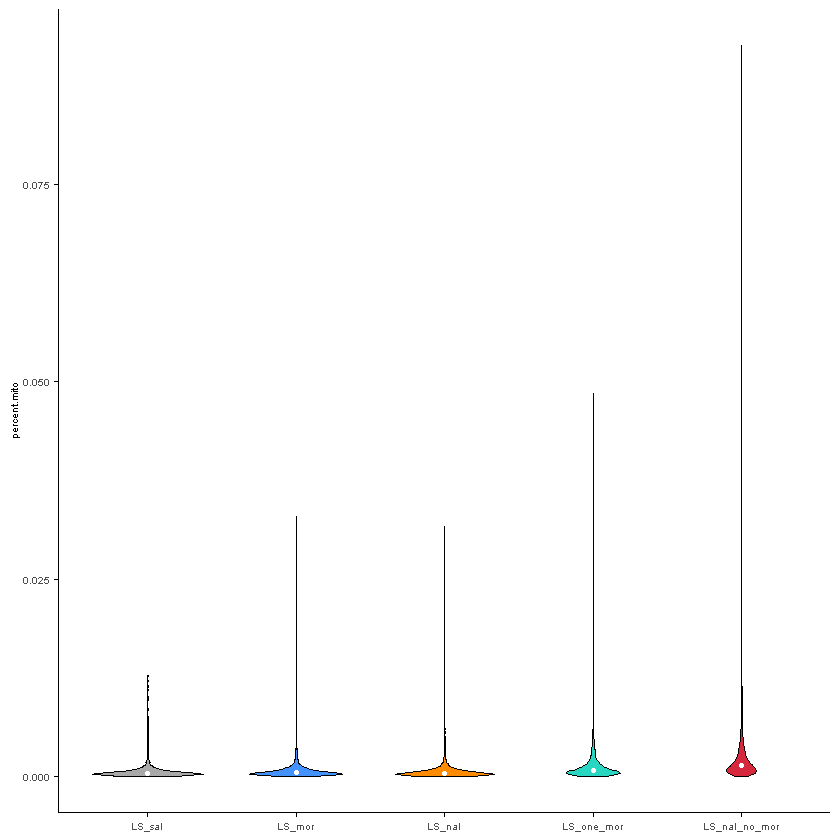

In [38]:
group.colors <- c(LS_sal="darkgray",LS_one_mor="#29D6C2",LS_mor="#4392FE", LS_nal_no_mor="#D6293D",LS_nal="darkorange")
pm <- ggplot(subset, aes(x=stim, y=percent.mito, color=stim, fill=stim)) + 
    geom_violin(width=0.75, size=0.25) +
    stat_summary(fun.y=median, geom="point", size=1, color="white")+
    theme_classic()+
    theme(axis.line = element_line(color="black",size=0.1),
           axis.title.x=element_blank(),
          axis.text.y=element_text(size=6) ,
            axis.title.y=element_text(size=6),
          axis.text.x=element_text( vjust=0.5, size=6),
          plot.title=element_blank()) +
    theme(legend.title = element_text(size = 8),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25))+
    ggtitle("UMI counts by group") +
    scale_fill_manual(values = group.colors)+
    scale_color_manual(values = c("black","black","black","black","black"))+
    NoLegend()
pm
#ggsave(file="Mito_by_group_combined.pdf",width=1,height=1)
#ggsave(file="Mito_by_group_combined.png",width=1,height=1)

Warning message:
"`fun.y` is deprecated. Use `fun` instead."


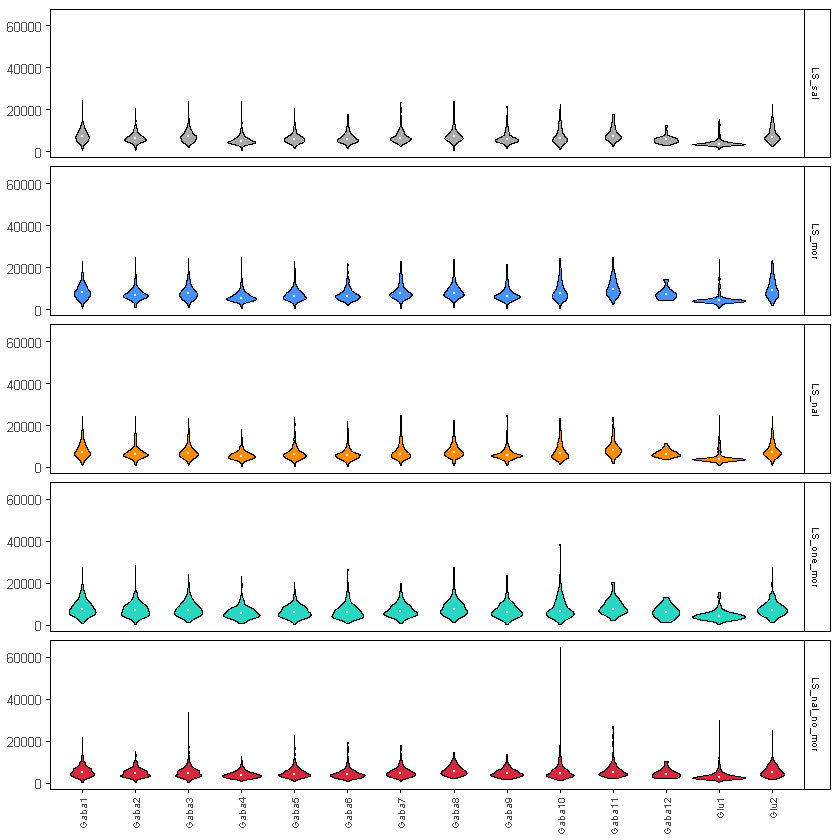

In [51]:
pm <- ggplot(subset, aes(x=celltype, y=percent.mito, fill=stim, color=stim,)) + 
geom_violin(width=1, size=0.25) +
stat_summary(fun.y=median, geom="point", size=0.25, color="white")+
theme_classic()+
theme(axis.line = element_line(color="black",size=0.1), 
      axis.text.y=element_text(size=8) ,
      axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=6) ,
      plot.title=element_blank(),
      axis.title=element_blank()) +
theme(legend.title = element_text(size = 11),legend.text = element_text(size = 6), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))+
ggtitle("UMI counts by group") +
scale_fill_manual(values = group.colors)+
scale_color_manual(values = c("black","black","black","black","black"))
pu + facet_grid(rows = vars(subset$stim)) + NoLegend() +
theme(strip.background = element_rect(color="black", size=0.25, linetype="solid"), strip.text.y = element_text(size = 6),
      panel.background = element_rect(colour = "black", size=.5, fill=NA))
ggsave(file="mito_by_group_reordered.png",width=3,height=3)
ggsave(file="mito_by_group_reordered.pdf",width=3,height=3)

In [ ]:
pg <- ggplot(subset, aes(x=celltype, y=percent.mito, color=celltype, fill=celltype)) + 
    geom_violin(width=0.75, size=0.25) +
    stat_summary(fun.y=median, geom="point", size=0.25, color="white")+
    theme_classic()+
    theme(axis.line = element_line(color="black",size=0.1),
           axis.title.x=element_blank(),
          axis.text.y=element_text(size=6) ,
            axis.title.y=element_blank(),
          axis.text.x=element_text( hjust=1,angle=45, size=6),
          plot.title=element_blank()) +
    theme(legend.title = element_text(size = 8),
          legend.text = element_text(size = 6), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.line = element_line(colour = 'black', size = .25))+
    ggtitle("UMI counts by group") +
    scale_fill_manual(values = my_cols2)+
    scale_color_manual(values = rep('black',14))+
    NoLegend()
pg
ggsave(file="mito_by_celltype.pdf",width=2.5,height=1)
ggsave(file="mito_by_celltype.png",width=2.5,height=1)

#### UMI:Gene ratio

In [46]:
wanted_col <- c("celltype","nCount_RNA","nFeature_RNA")

In [47]:
subset <- as.data.frame(LS.integrated@meta.data[,wanted_col])

In [48]:
subset$celltype <- factor(subset$celltype, levels=c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Gaba8","Gaba9","Gaba10","Gaba11","Gaba12","Glu1",'Glu2'))

In [49]:
subset$celltype <- factor(subset$celltype, levels=c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"position_dodge requires non-overlapping x intervals"


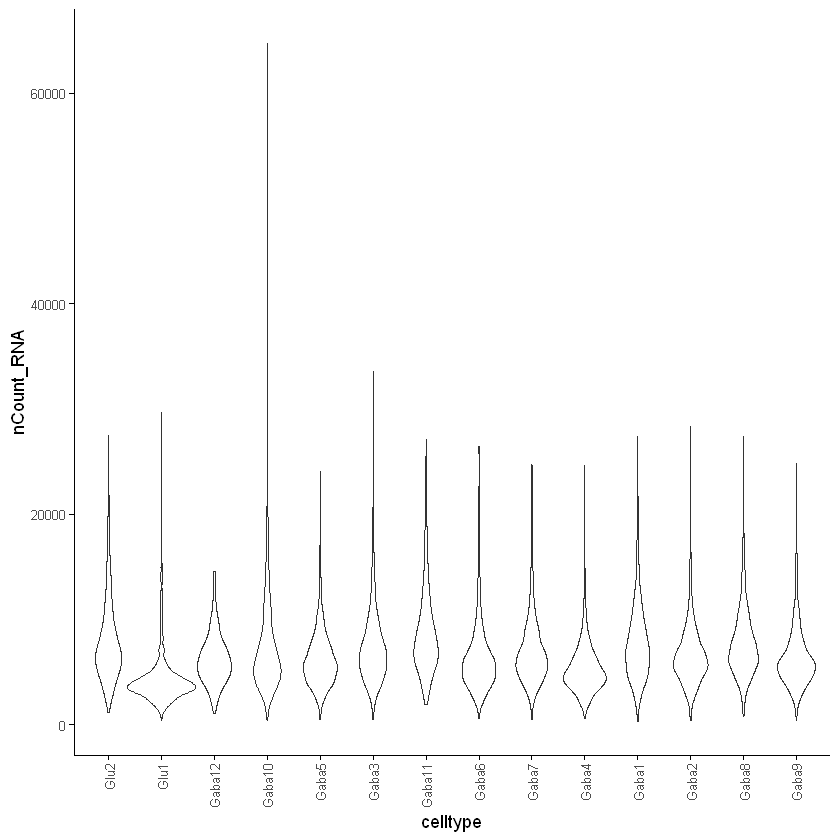

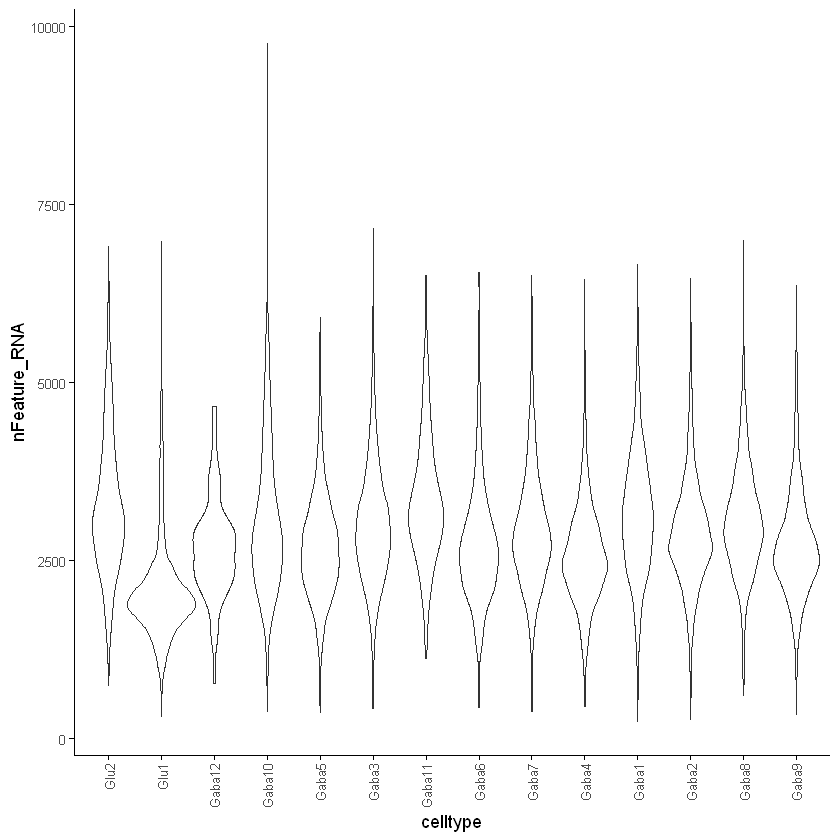

In [50]:
#remaking UMI and gene violin plots to grab median counts
pu <- ggplot(subset, aes(x=celltype, y=nCount_RNA)) + 
geom_violin(width=1.3, size=0.25) +
stat_summary(fun.y=median, geom="point", size=0.5, color="white")+
theme_classic()+
theme(axis.line = element_line(color="black",size=0.1), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8) ,plot.title=element_text(size=10, face="bold")) +
theme(legend.title = element_text(size = 11),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))
pu

pg <- ggplot(subset, aes(x=celltype, y=nFeature_RNA)) + 
geom_violin(width=1.3, size=0.25) +
stat_summary(fun.y=median, geom="point", size=0.5, color="white")+
theme_classic()+
theme(axis.line = element_line(color="black",size=0.1), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8) ,plot.title=element_text(size=10, face="bold")) +
theme(legend.title = element_text(size = 11),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))
pg

In [51]:
UMI_median <- as.data.frame(ggplot_build(pu)$data[[2]]$y)
colnames(UMI_median)[1] <- "UMI"
gene_median <- as.data.frame(ggplot_build(pg)$data[[2]]$y)
colnames(gene_median)[1] <- "Gene"

Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"position_dodge requires non-overlapping x intervals"


In [52]:
Cell_type <- as.data.frame(c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12"))
colnames(Cell_type)[1] <- "Cluster"

In [53]:
Cell_type <- as.data.frame(c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))
colnames(Cell_type)[1] <- "Cluster"

In [54]:
stat_table <- cbind(Cell_type,UMI_median,gene_median)
stat_table$ratio <- stat_table$UMI / stat_table$Gene

In [55]:
stat_table$Cluster <- factor(stat_table$Cluster, levels=c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Gaba8","Gaba9","Gaba10","Gaba11","Gaba12","Glu1",'Glu2'))

In [56]:
stat_table$Cluster <- factor(stat_table$Cluster, levels=c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

In [57]:
stat_table

Cluster,UMI,Gene,ratio
<fct>,<dbl>,<dbl>,<dbl>
Glu2,7044.0,3108.0,2.266409
Glu1,3810.0,1944.0,1.959877
Gaba12,5925.0,2649.5,2.236271
Gaba10,6218.0,2860.5,2.173746
Gaba5,5861.0,2635.0,2.224288
Gaba3,6798.0,2914.5,2.332476
Gaba11,7826.0,3211.0,2.437247
Gaba6,5663.0,2614.0,2.166412
Gaba7,6384.0,2826.5,2.258624


In [ ]:
ggplot(data=stat_table, aes (x=Cluster, y=ratio, fill=Cluster)) +
    geom_bar(stat="identity", position="identity") +
    scale_y_continuous(breaks = seq(0, 2.5, by = 0.5), limits=c(0,2.5), expand = c(0, 0))+
    geom_hline(yintercept=2, linetype="dashed", size=0.25)+
    theme_classic() +
    theme(axis.line = element_line(color="black",size=0.25),  
          axis.text.y=element_text(size=8),
          axis.text.x=element_text(angle = 45, hjust=1, size=8), 
          plot.title=element_text(size=10)) +
    theme(legend.title = element_text(size = 11),
          legend.text = element_text(size = 8), 
          axis.ticks = element_line(colour = "black", size = .25), 
          axis.title.x=element_blank())+
    theme(axis.text=element_text(size=6),
         axis.title=element_text(size=8))
    ylab("UMI:Gene ratio") +
    scale_fill_manual(values = my_cols2)
    #scale_color_manual(values = rep('black',14))

#ggsave(file="umi_ratio_neurons_reordered.pdf",width=3,height=2)
#ggsave(file="umi_ratio_neurons_reordered.png",width=3,height=2)

In [ ]:
p <- ggplot(data=stat_table, aes (x=Cluster, y=ratio)) +
geom_bar(stat="identity", position="identity") +
scale_y_continuous(breaks = seq(0, 3, by = 0.5), limits=c(0,3), expand = c(0, 0))+
geom_hline(yintercept=2, linetype="dashed", size=0.25)+
theme_classic() +
theme(axis.line = element_line(color="black",size=0.1), panel.grid.major = element_blank(), panel.grid.minor = element_blank(), axis.text.y=element_text(size=8) ,axis.text.x=element_text(angle = 90, vjust=0.5, hjust = 1, size=8, ) ,plot.title=element_text(size=11)) +
theme(legend.title = element_text(size = 11),legend.text = element_text(size = 8), axis.ticks = element_line(colour = "black", size = .25), axis.line = element_line(colour = 'black', size = .25))+
ggtitle("UMI:Gene ratio among all clusters") +
expand_limits(x = 0, y = 0) 
p

#ggsave(file="UMI_gene_ratio_reordered.pdf",width=4,height=4)
#ggsave(file="UMI_gene_ratio_reordered.png",width=4,height=4)

### % Enrichment of each major cell type in the dataset

In [78]:
total<-sum(data.frame(table(Idents(LS.integrated)))$Freq)

In [79]:
Nts <- sum(data.frame(table(Idents(subset(LS.integrated, Nts > 0))))$Freq)/total*100
Sst <- sum(data.frame(table(Idents(subset(LS.integrated, Sst > 0))))$Freq)/total*100
Crhr2 <- sum(data.frame(table(Idents(subset(LS.integrated, Crhr2 > 0))))$Freq)/total*100
Drd2 <- sum(data.frame(table(Idents(subset(LS.integrated, Drd2 > 0))))$Freq)/total*100
Drd3 <- sum(data.frame(table(Idents(subset(LS.integrated, Drd3 > 0))))$Freq)/total*100
Met <- sum(data.frame(table(Idents(subset(LS.integrated, Met > 0))))$Freq)/total*100
Esr1 <- sum(data.frame(table(Idents(subset(LS.integrated, Esr1 > 0))))$Freq)/total*100
Slc17a6 <- sum(data.frame(table(Idents(subset(LS.integrated, Slc17a6 > 0))))$Freq)/total*100
Slc32a1 <- sum(data.frame(table(Idents(subset(LS.integrated, Slc32a1 > 0))))$Freq)/total*100
Tacr1 <- sum(data.frame(table(Idents(subset(LS.integrated, Tacr1 > 0))))$Freq)/total*100
Pax6 <- sum(data.frame(table(Idents(subset(LS.integrated, Pax6 > 0))))$Freq)/total*100
Foxp2 <- sum(data.frame(table(Idents(subset(LS.integrated, Foxp2 > 0))))$Freq)/total*100
Samd3 <- sum(data.frame(table(Idents(subset(LS.integrated, Samd3 > 0))))$Freq)/total*100
Onecut2 <- sum(data.frame(table(Idents(subset(LS.integrated, Onecut2 > 0))))$Freq)/total*100
Col15a1 <- sum(data.frame(table(Idents(subset(LS.integrated, Col15a1 > 0))))$Freq)/total*100

In [80]:
tally <-data.frame("nts"=Nts, 
          "sst"=Sst,
          "crhr2"=Crhr2,
          "drd2"=Drd2,
          "drd3"=Drd3,
          "met"=Met,
          "esr1"=Esr1,
          "vglut2"=Slc17a6,
          "vgat"=Slc32a1,
           "tacr1"=Tacr1,
           "pax6"=Pax6,
           "foxp2"=Foxp2,
           "samd3"=Samd3,
           "onecut2"=Onecut2,
           "col15a1"=Col15a1)

In [81]:
tally<-data.frame(t(tally))
tally$gene <- rownames(tally)
colnames(tally)<-c('prop','gene')

In [82]:
tally

,prop,gene
,<dbl>,<chr>
nts,12.805092,nts
sst,17.831062,sst
crhr2,6.873121,crhr2
drd2,13.574413,drd2
drd3,4.721365,drd3
met,9.149842,met
esr1,7.954856,esr1
vglut2,8.001718,vglut2
vgat,41.824501,vgat


In [ ]:
saveRDS(tally, file='C:/Users/stuberadmin/Documents/HCR_analysis/graphs/seq_tally.rds')

### Feature plots

In [11]:
LS.integrated <- NormalizeData(LS.integrated, assay='RNA')

In [ ]:
RidgePlot(LS.integrated, feature='Oprm1', group.by='stim', assay='RNA')

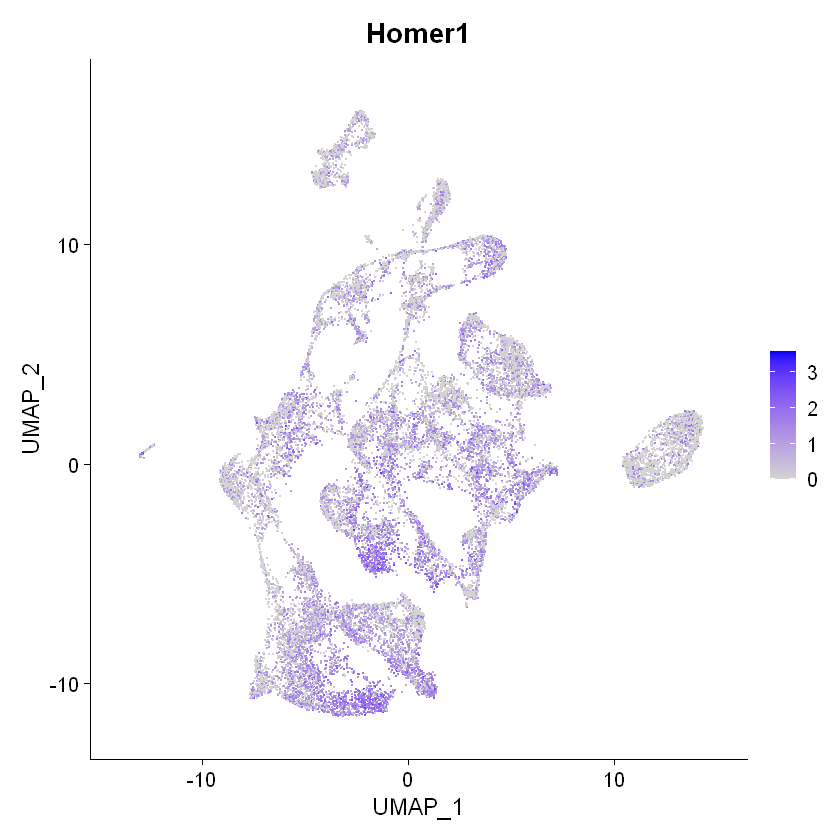

In [13]:
FeaturePlot(LS.integrated, 'Homer1', order=FALSE)

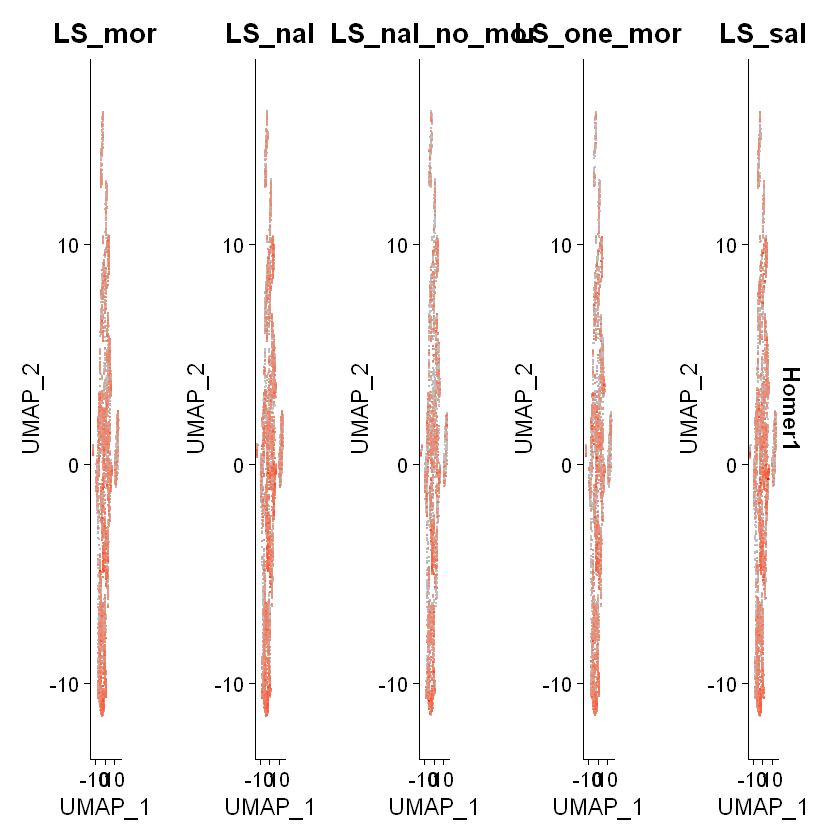

In [21]:
FeaturePlot(LS.integrated, 'Homer1',split.by='stim', order=TRUE, col=c('gray','red'))

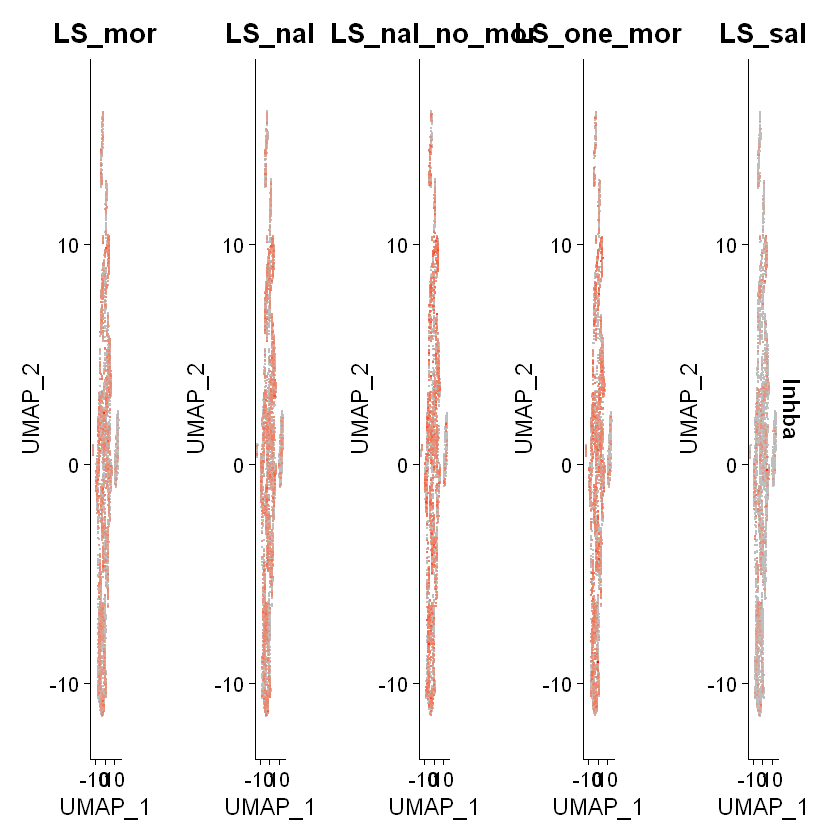

In [32]:
FeaturePlot(LS.integrated, 'Inhba',split.by='stim', order=TRUE, col=c('gray','red'), pt.size=0.1) 
ggsave(file='C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter2/IEG/mor_v_nal/Fos_feature_by_group.pdf', width=15, height=3)

In [ ]:
FeaturePlot(LS.integrated, 'Tgm2', order=TRUE)

In [ ]:
DotPlot(LS.integrated, feature='Tgm2', scale=FALSE)

In [ ]:
DefaultAssay(LS.integrated) <- "SCT"

In [18]:
LS.integrated <- NormalizeData(LS.integrated, assay='RNA')

In [19]:
DefaultAssay(LS.integrated) <- "RNA"

In [ ]:
?FindConservedMarkers

In [ ]:
?DimPlot

In [ ]:
F <- DimPlot(LS.integrated, sizes.highlight=0.25, pt.size=.1, ncol=1, group.by='stim', split.by='stim')+
theme_classic()+
theme(axis.line=element_blank(),
      plot.title=element_blank(),
      axis.ticks=element_blank(),
       axis.text=element_blank(),
     axis.title=element_blank()) + NoLegend()
F
ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/stim_clusters.pdf",width=5,height=17)
ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/stim_clusters.png",width=5,height=17)
#c(Gaba1_barcode, Gaba2_barcode, Gaba3_barcode, Gaba4_barcode, Gaba5_barcode, Gaba6_barcode, Gaba7_barcode, Gaba8_barcode, Gaba9_barcode, Gaba10_barcode, Gaba11_barcode, Gaba12_barcode)

In [ ]:
F <- DimPlot(LS.integrated, sizes.highlight=0.25, cells.highlight = c(Gaba2_barcode), cols.highlight=c("red"), pt.size=.1, ncol=1)+
theme_classic()+
theme(axis.line=element_blank(),
      plot.title=element_blank(),
      axis.ticks=element_blank(),
       axis.text=element_blank(),
     axis.title=element_blank()) + NoLegend()
F
ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Gaba2_clusters.pdf",width=5,height=5)
ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Gaba2_clusters.png",width=5,height=5)
#c(Gaba1_barcode, Gaba2_barcode, Gaba3_barcode, Gaba4_barcode, Gaba5_barcode, Gaba6_barcode, Gaba7_barcode, Gaba8_barcode, Gaba9_barcode, Gaba10_barcode, Gaba11_barcode, Gaba12_barcode)

In [ ]:
DotPlot(LS.integrated, feature="Drd3")

In [ ]:
F <- FeaturePlot(object =LS.integrated, features = c("Meis2"), cols=c("gray","red"), pt.size=.1, ncol=1, order=FALSE)+
theme_classic()+
theme(axis.line=element_blank(),
      plot.title=element_blank(),
      axis.ticks=element_blank(),
       axis.text=element_blank(),
     axis.title=element_blank())

ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Meis2_scale.pdf",width=3,height=3)
ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Meis2_scale.png",width=3,height=3)

F2 <- F + NoLegend()

ggsave(F2,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Meis2.pdf",width=4,height=3)
ggsave(F2,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Meis2.png",width=4,height=3)

F2

In [ ]:
F <- FeaturePlot(object =LS.integrated, features = c("Ndnf"), cols=c("gray","red"), pt.size=.1, ncol=1, order=TRUE)+
theme_classic()+
theme(axis.line=element_blank(),
      plot.title=element_blank(),
      axis.ticks=element_blank(),
       axis.text=element_blank(),
     axis.title=element_blank())

ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/transcription_factors/Ndnf_scale.pdf",width=3,height=3)
ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/transcription_factors/Ndnf_scale.png",width=3,height=3)

F2 <- F + NoLegend()

ggsave(F2,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/transcription_factors/Ndnf.pdf",width=4,height=3)
ggsave(F2,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/transcription_factors/Ndnf.png",width=4,height=3)

F2

In [ ]:
F <- FeaturePlot(object =LS.integrated, features = c("Jun"), cols=c("gray","red"), pt.size=.1, ncol=1, order=TRUE, split.by='stim')+
theme_classic()+
theme(axis.line=element_blank(),
      plot.title=element_blank(),
      axis.ticks=element_blank(),
       axis.text=element_blank(),
     axis.title=element_blank())

ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Jun_group_scale.pdf",width=15,height=3)
ggsave(F,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Jun_group_scale.png",width=15,height=3)

F2 <- F + NoLegend()

ggsave(F2,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Jun_group.pdf",width=20,height=3)
ggsave(F2,file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/feature_plots/Jun_group.png",width=20,height=3)

In [ ]:
F2

In [ ]:
?FeaturePlot

In [ ]:
F <- FeaturePlot(object =LS.integrated, features = c("Oprm1"), cols=c("gray","blue"), pt.size=.1, ncol=1, order=TRUE, slot='data')+
theme_classic()+
theme(axis.line=element_blank(),
      plot.title=element_text(size=10),
      axis.ticks=element_blank(),
       axis.text=element_blank(),
     axis.title=element_blank())
F


In [ ]:
RidgePlot(LS.integrated, 'Oprm1', group.by='stim')

In [ ]:
LS.integrated <- NormalizeData(LS.integrated)

In [ ]:
mycols <- c('Gaba1'='#491822','Gaba11'='#672235','Gaba3'='#77283F','Gaba4'='#822B4F','Gaba6'='#8A2E6A','Gaba10'='#8D3091','Gaba7'='#6836A1','Gaba2'='#4939AC','Gaba5'='#3956AC','Gaba8'='#3988AC','Gaba9'='#3BB0AA','Gaba12'='#CACF6E','Glu1'='#6ECFA1','Glu2'='#99D685')

In [ ]:
mycols <- c('Gaba1'='#D2797F','Gaba11'='#D47D9A','Gaba3'='#D47DB2','Gaba4'='#C579D2','Gaba6'='#9D79D2','Gaba10'='#8189D5','Gaba7'='#85A0D6','Gaba2'='#88B9D7','Gaba5'='#88D7D7','Gaba8'='#90DAB9','Gaba9'='#94DB96','Gaba12'='#B4DE9C','Glu1'='#DDE0A3','Glu2'='#E7BFB6')

In [ ]:
my_cols2 <- mycols[order(as.integer(names(mycols)))]
scales::show_col(my_cols2)

In [ ]:
levels(LS.integrated) <- c('Gaba1','Gaba2','Gaba3','Gaba4','Gaba5','Gaba6','Gaba7','Gaba8','Gaba9','Gaba10','Gaba11','Gaba12','Glu1','Glu2')

In [ ]:
?VlnPlot

In [ ]:
VlnPlot(LS.integrated, features = c('Slc32a1'), cols=my_cols2, pt.size=0)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/violin_plots/Vgat.pdf",width=15,height=3)
VlnPlot(LS.integrated, features = c('Slc17a6'), cols=my_cols2, pt.size=0)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/violin_plots/Vglut2.pdf",width=15,height=3)
VlnPlot(LS.integrated, features = c('Nts'), cols=my_cols2, pt.size=0)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/violin_plots/Nts.pdf",width=15,height=3)
VlnPlot(LS.integrated, features = c('Sst'), cols=my_cols2, pt.size=0)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/violin_plots/Sst.pdf",width=15,height=3)
VlnPlot(LS.integrated, features = c('Crhr2'), cols=my_cols2, pt.size=0)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/violin_plots/Crhr2.pdf",width=15,height=3)
VlnPlot(LS.integrated, features = c('Oprm1'), cols=my_cols2, pt.size=0)
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/violin_plots/Oprm1.pdf",width=15,height=3)

## Checking data quality

# disc plot

#### DEGs

In [ ]:
DefaultAssay(LS.integrated) <- 'RNA'

In [ ]:
LS.integrated <- NormalizeData(LS.integrated)

In [ ]:
Cell_type <- c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9")

In [ ]:
gene_list <- c('Nts','Drd2')

In [ ]:
?DotPlot

In [ ]:
DotPlot(LS.integrated, feature = 'Oprm1', cols=c('white','red'))$data

In [ ]:
DotPlot(LS.integrated, feature = 'Oprm1', cols=c('gray','red')) +
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/oprm1.pdf",height=4, width=2)

In [ ]:
# Define an order of cluster identities
my_levels <- rev(c("Gaba9","Gaba8","Gaba6","Gaba7","Glu2","Gaba3","Gaba1","Gaba5","Gaba10","Gaba12","Glu1","Gaba4","Gaba2","Gaba11"))

# Relevel object@ident
Idents(LS.integrated) <- factor(x = Idents(LS.integrated), levels = my_levels)

In [ ]:
DotPlot(LS.integrated, feature = c('Oprm1','Drd2','Adra1a','Nts'), cols=c('gray','red')) +
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/oprm1_nts_drd2_adra1a.pdf",height=4, width=2)

In [ ]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba7")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [ ]:
?DotPlot

In [ ]:
DotPlot(LS.integrated, feature = c('Oprm1','Oprd1','Oprk1','Oprl1','Penk','Pdyn','Pnoc'), cols=c('gray','red'), idents=c('Gaba5','Gaba7','Gaba4'), scale = TRUE) +
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/lhx2_foxp2_esr1_opioids.pdf",height=2, width=2)

In [ ]:
gene_list <- c("Sema3a", "Sst", "Zeb2", "Col15a1", "Crhr2","Hunk","Stac2", "Tacr1", "Foxp2","Drd3", "Nts","Tmem132c","Esr1", "Pax6","Onecut2","Sox6")

In [ ]:
Cell_number_avg<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_avg_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_avg_t$pct[p]<-100*sum(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_avg_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]))
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_avg_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number_avg<-rbind(Cell_number_avg_t,Cell_number_avg)}
as.factor(Cell_number_avg$cluster)

In [ ]:
#zscoring
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$zscore[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],rownames(subset(LS.integrated@meta.data,celltype==Cell_type[p]))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
Cell_number_t$pct[p]<-100*sum(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
#Cell_number_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])  
#Cell_number_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

In [ ]:
#zscoring
Cell_number_drd<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_drd_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_drd_t$zscore[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],rownames(subset(LS.integrated@meta.data,celltype==Cell_type[p]))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
Cell_number_drd_t$pct[p]<-100*sum(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
#Cell_number_drd_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_drd_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])  
#Cell_number_drd_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
    }
Cell_number_drd<-rbind(Cell_number_drd_t,Cell_number_drd)}
as.factor(Cell_number_drd$cluster)

In [ ]:
#zscoring
Cell_number_op<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_op_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_op_t$zscore[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],rownames(subset(LS.integrated@meta.data,celltype==Cell_type[p]))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
Cell_number_op_t$pct[p]<-100*sum(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
#Cell_number_op_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_op_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])  
#Cell_number_op_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
    }
Cell_number_op<-rbind(Cell_number_op_t,Cell_number_op)}
as.factor(Cell_number_op$cluster)

In [ ]:
#zscoring
Cell_number_canonical<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_canonical_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_canonical_t$zscore[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],rownames(subset(LS.integrated@meta.data,celltype==Cell_type[p]))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
Cell_number_canonical_t$pct[p]<-100*sum(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
#Cell_number_canonical_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_canonical_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])  
#Cell_number_canonical_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
    }
Cell_number_canonical<-rbind(Cell_number_canonical_t,Cell_number_canonical)}
as.factor(Cell_number_canonical$cluster)

In [ ]:
Cell_number$cluster<-factor(Cell_number$cluster, levels=c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vglu1','Vglu2'))

In [ ]:
Cell_number$cluster<-factor(Cell_number$cluster, levels=c(c("Vglu1","Vgat17","Vgat1","Vgat9","Vgat7","Vgat4","Vgat5","Vgat16","Vgat6","Vgat12","Vgat14","Vgat2","Vgat8","Vgat13","Vgat3","Vgat10","Vgat11","Vglu2","Vgat15")))

In [ ]:
Cell_number$cluster<-factor(Cell_number$cluster, levels=rev(c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vglu1','Vglu2')))

In [ ]:
Cell_number_avg$cluster<-factor(Cell_number_avg$cluster, levels=c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vglu1','Vglu2'))

In [ ]:
Cell_number_avg$gene<-factor(Cell_number_avg$gene, levels=rev(c("Sema3a", "Sst", "Zeb2", "Cpa6", "Crhr2","Stac2", "Tacr1", "Foxp2","Drd3", "Nts","Tmem132c","Esr1", "Pax6","Onecut2","Sox6")))

In [ ]:
Cell_number_avg$cluster<-factor(Cell_number_avg$cluster, levels=c(c("Vglu1","Vgat17","Vgat1","Vgat9","Vgat7","Vgat4","Vgat5","Vgat16","Vgat6","Vgat12","Vgat14","Vgat2","Vgat8","Vgat13","Vgat3","Vgat10","Vgat11","Vglu2","Vgat15")))

In [ ]:
Cell_number$cluster<-factor(Cell_number$cluster, levels=c(c("Vglu1","Vgat17","Vgat1","Vgat9","Vgat7","Vgat4","Vgat5","Vgat16","Vgat6","Vgat12","Vgat14","Vgat2","Vgat8","Vgat13","Vgat3","Vgat10","Vgat11","Vglu2","Vgat15")))

In [ ]:
Cell_number$gene<-factor(Cell_number$gene, levels=rev(c("Sema3a", "Sst", "Zeb2", "Cpa6", "Crhr2","Stac2", "Tacr1", "Foxp2","Drd3", "Nts","Tmem132c","Esr1", "Pax6","Onecut2","Sox6")))

In [ ]:
Cell_number_drd$cluster<-factor(Cell_number_drd$cluster, levels=c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vglu1','Vglu2'))

In [ ]:
Cell_number_op$cluster<-factor(Cell_number_op$cluster, levels=c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vglu1','Vglu2'))

In [ ]:
Cell_number_canonical$cluster<-factor(Cell_number_canonical$cluster, levels=c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vglu1','Vglu2'))

In [ ]:
library(scales)
library(reshape2)


In [ ]:
P <- ggplot(Cell_number_avg, aes(cluster, gene)) + 
geom_point(aes(size = pct, colour=avg)) +  
scale_x_discrete(limits = (levels(Cell_number_avg$cluster)))+
scale_y_discrete(limits =(levels(Cell_number_avg$gene)))+
scale_color_gradient2(low = "darkgreen", mid="gray", high = "red",midpoint=0,limits = c(0,0.4),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/receptor_dotplot_1_20.svg",height=4, width=2)
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/receptor_dotplot_1_20.png",height=4, width=2)
P

In [ ]:
P <- ggplot(Cell_number, aes(cluster, gene, fill=zscore)) + 
geom_tile() +  scale_fill_gradient2(limits=c(-1,1), breaks=seq(-1,1,by=0.5),low = "blue",mid="white",high = "darkorange", midpoint=0, oob=squish) +
scale_x_discrete(limits = (levels(Cell_number_avg$cluster)))+
scale_y_discrete(limits =(levels(Cell_number_avg$gene)))+
scale_color_gradient2(low = "darkgreen", mid="gray", high = "red",midpoint=0,limits = c(0,0.4),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/receptor_dotplot.svg",height=4, width=2)
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/receptor_dotplot.png",height=4, width=2)
P

In [ ]:
Cell_number$gene<-factor(Cell_number$gene, levels=c("Drd1","Drd2","Drd3"))

In [ ]:
library(scales)

In [ ]:
?geom_point()

In [ ]:
P2 <- ggplot(Cell_number, aes(cluster,gene)) + 
geom_point(aes(size = pct, colour=zscore)) +
scale_x_discrete(limits = (levels(Cell_number$cluster)))+
scale_y_discrete(limits =(levels(Cell_number$gene)))+
scale_color_gradient2(low = "darkgreen", mid="gray", high = "red",midpoint=0,limits = c(0,1),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='left')
#scale_x_discrete(limits = rev(levels(gene)))
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/receptor_zscore.pdf",height=4, width=2)
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/receptor_zscore.png",height=4, width=2)
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/receptor_zscore.svg",height=4, width=2)
P2

In [ ]:
VlnPlot(LS.integrated, "Foxp2", group.by="stim")

In [ ]:
P2 <- ggplot(Cell_number, aes(cluster,gene)) + 
geom_point(aes(size = pct, colour=zscore)) +
scale_x_discrete(limits = (levels(Cell_number$cluster)))+
scale_y_discrete(limits =(levels(Cell_number$gene)))+
scale_color_gradient2(low = "darkgreen", mid="gray", high = "red",midpoint=0,limits = c(0,2),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')
#scale_x_discrete(limits = rev(levels(gene)))
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/conserved_markers/conserved_markers_dotplot_zscore.pdf",height=4, width=4)
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/conserved_markers/conserved_markers_dotplot_zscore.png",height=4, width=4)
#ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/conserved_markers/conserved_markers_dotplot_zscore.svg",height=5, width=6)
P2

In [ ]:
P_drd <- ggplot(Cell_number_avg, aes(cluster, gene)) + 
geom_point(aes(size = pct, colour=avg)) +  
scale_x_discrete(limits = (levels(Cell_number_avg$cluster)))+
scale_y_discrete(limits =(levels(Cell_number_avg$gene)))+
scale_color_gradient2(low = "darkgreen", mid="white", high = "darkblue",midpoint=0,limits = c(0,1),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
theme_classic()+
    theme(axis.title.y=element_text(size=10),
          axis.title.x=element_blank(),
          axis.text.y=element_text(size=8,colour = "black"),
          axis.text.x=element_text(size=8,angle = 50, hjust =1,colour = "black"),
          #panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          #panel.background = element_blank(), 
          axis.line = element_line(colour = "black"),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.5, fill=NA))
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/cre_genes_avg.pdf",height=11.4, width=6 , paper = "letter")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/cre_genes_avg.png",height=11.4, width=6)
P_drd

In [ ]:
P_drd <- ggplot(Cell_number, aes(cluster, gene)) + 
geom_point(aes(size = pct, colour=zscore)) +  
scale_x_discrete(limits = (levels(Cell_number$cluster)))+
scale_y_discrete(limits =(levels(Cell_number$gene)))+
scale_color_gradient2(low = "darkgreen", mid="white", high = "darkblue",midpoint=0,limits = c(0,0.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
theme_classic()+
    theme(axis.title.y=element_text(size=10),
          axis.title.x=element_blank(),
          axis.text.y=element_text(size=8,colour = "black"),
          axis.text.x=element_text(size=8,angle = 50, hjust =1,colour = "black"),
          #panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          #panel.background = element_blank(), 
          axis.line = element_line(colour = "black"),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.5, fill=NA))
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/cre_genes.pdf",height=11.4, width=6 , paper = "letter")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/cre_genes.png",height=11.4, width=6)
P_drd

In [ ]:
P_drd <- ggplot(Cell_number_drd, aes(cluster, gene)) + 
geom_point(aes(size = pct, colour=zscore)) +  
scale_x_discrete(limits = (levels(Cell_number_drd$cluster)))+
scale_y_discrete(limits =(levels(Cell_number_drd$gene)))+
scale_color_gradient2(low = "darkgreen", mid="white", high = "darkblue",midpoint=0,limits = c(0,1),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
theme_classic()+
    theme(axis.title.y=element_text(size=10),
          axis.title.x=element_blank(),
          axis.text.y=element_text(size=8,colour = "black"),
          axis.text.x=element_text(size=8,angle = 50, hjust =1,colour = "black"),
          #panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          #panel.background = element_blank(), 
          axis.line = element_line(colour = "black"),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.5, fill=NA))
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/cre_genes.pdf",height=3, width=6 , paper = "letter")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/cre_genes.png",height=3, width=6)
P_drd

In [ ]:
P_op <- ggplot(Cell_number_op, aes(cluster, gene)) + 
geom_point(aes(size = pct, colour=zscore)) +  
scale_x_discrete(limits = (levels(Cell_number_op$cluster)))+
scale_y_discrete(limits =(levels(Cell_number_op$gene)))+
scale_color_gradient2(low = "darkgreen", mid="white", high = "darkblue",midpoint=0,limits = c(0,1),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
theme_classic()+
    theme(axis.title.y=element_text(size=10),
          axis.title.x=element_blank(),
          axis.text.y=element_text(size=8,colour = "black"),
          axis.text.x=element_text(size=8,angle = 50, hjust =1,colour = "black"),
          #panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          #panel.background = element_blank(), 
          axis.line = element_line(colour = "black"),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(colour = "black", size=.5, fill=NA))
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/op_genes.pdf",height=1.8, width=6 , paper = "letter")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/op_genes.png",height=1.8, width=6)
P_op

In [ ]:
P_canonical <- ggplot(Cell_number_canonical, aes(cluster, gene)) + 
geom_point(aes(size = pct, colour=zscore)) +  
scale_x_discrete(limits = (levels(Cell_number_canonical$cluster)))+
scale_y_discrete(limits =(levels(Cell_number_canonical$gene)))+
scale_color_gradient2(low = "darkgreen", mid="white", high = "darkblue",midpoint=0,limits = c(0,1),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
    theme(axis.title.y=element_text(size=10),
          axis.title.x=element_blank(),
          axis.text.y=element_text(size=8,colour = "black"),
          axis.text.x=element_text(size=8,angle = 50, hjust =1,colour = "black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"),
          legend.key.size = unit(0.4, "cm"))
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/canonical_genes.pdf",height=3, width=6 , paper = "letter")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/canonical_genes.png",height=3, width=6)
P_canonical

In [ ]:
P <- ggplot(Cell_number, aes(cluster, gene)) + 
geom_point(aes(size = pct, colour=zscore)) +  
scale_x_discrete(limits = (levels(Cell_number$cluster)))+
scale_y_discrete(limits =(levels(Cell_number$gene)))+
scale_color_gradient2(low = "darkgreen", mid="white", high = "darkblue",midpoint=0,limits = c(0,1),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ 
scale_size_continuous(range = c(0,6))+
    theme(axis.title.y=element_text(size=10),
          axis.title.x=element_blank(),
          axis.text.y=element_text(size=8,colour = "black"),
          axis.text.x=element_text(size=8,angle = 50, hjust =1,colour = "black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"),
          legend.key.size = unit(0.4, "cm"))
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/drd_genes.pdf",height=3, width=6 , paper = "letter")
ggsave(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/discplots/drd_genes.png",height=3, width=6)
P

In [ ]:
low<- -1.0
high<-1.0
p<-ggplot(Cell_number, aes(gene, cluster))+ 
  geom_tile(aes(fill =zscore))+ scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.15),low = "darkgreen", mid="white",high = "red", midpoint=0,oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+theme(axis.text.x=element_text(angle=90, size=8),axis.text.y=element_blank(),plot.title = element_text(size=12),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_blank(),axis.ticks.y = element_blank(),axis.ticks.x = element_blank(),
legend.key.height= unit(1.5, 'cm'), legend.key.width = unit(0.2, 'cm'))+
xlab('Genes') +
ylab('Group') +
coord_flip()
#scale_y_discrete(labels= newlabs)
print(pp)
#ggsave(file='/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/DEG/Group/DEG_heatmap.png',width=5,height=5)

GPCR

In [ ]:
DefaultAssay(LS.integrated) <- "RNA"

In [ ]:
#http://www.informatics.jax.org/vocab/gene_ontology/GO:0004930
GPCR<-read.xlsx2(file="/Users/stuberadmin/Documents/scRNAseq/191204/Neurons_only_iter4/discplots/gpcrs/results_gpcrs.xlsx", 1,stringsAsFactors = FALSE)

In [ ]:
GPCR<-GPCR[grep("receptor",GPCR$Name),]

In [ ]:
Cell_type<-factor(rev(c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vglut1","Vglut2")))
gene_list<-intersect(unique(GPCR$gene),rownames(LS.integrated@assays$RNA@data))

In [ ]:
gene_list<-sort(gene_list)

In [ ]:
#gene_list<-rev(gene_list[1:50])
#gene_list<-rev(gene_list[51:100])
#gene_list<-rev(gene_list[101:150])
#gene_list<-rev(gene_list[151:200])
#gene_list<-rev(gene_list[201:250])
gene_list<-rev(gene_list[251:302])

In [ ]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=c(rep(gene_list[i],L)))
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]))
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

In [ ]:
library(scales)

In [ ]:
Cell_number$cluster <- factor(Cell_number$cluster, rev(c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vglut1","Vglut2")))

In [ ]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg, stat="identity")) + 
scale_color_gradient(low = "white", high = "darkblue",limits = c(0,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,3.8),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/discplots/GPCRs_pt6_dotplot.pdf",height=4, width=10 , paper = "letter")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/discplots/GPCRs_pt6_dotplot.svg")

In [ ]:
#reverse
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =rev(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(0,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 0, hjust = 0.5),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/discplots/GPCRs_pt6_dotplot_trans.pdf",height=4, width=10 , paper = "letter")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/discplots/GPCRs_pt6_dotplot_trans.svg")

neuropeptide

In [ ]:
#neuropeptide,http://www.informatics.jax.org/go/term/GO:0007218
NP<-read.xlsx2(file="/Users/stuberadmin/Documents/scRNAseq/191204/Neurons_only_iter4/discplots/neuropeptides/results_neuropeptides.xlsx", 1,stringsAsFactors = FALSE)

In [ ]:
NP<-NP[-grep("receptor",NP$Name),]

In [ ]:
Cell_type<-factor(rev(c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vglut1","Vglut2")))
gene_list<-intersect(unique(NP$gene),rownames(LS.integrated@assays$RNA@data))

In [ ]:
gene_list<-sort(gene_list)

In [ ]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=c(rep(gene_list[i],L)))
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

In [ ]:
Cell_number$cluster <- factor(Cell_number$cluster, rev(c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vglut1","Vglut2")))

In [ ]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits =rev(levels(Cell_number$gene)))+scale_color_gradient(low = "white", high = "darkblue",limits = c(0,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,3.8),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/discplots/Neuropeptides_dotplot.pdf",height=4, width=10 , paper = "letter")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/discplots/Neuropeptides_dotplot.svg")

In [ ]:
#reverse
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(0,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 0, hjust = 0.5),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/discplots/Neuropeptides_dotplot_trans.pdf",height=4, width=10 , paper = "letter")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/discplots/Neuropeptides_dotplot_trans.svg")

miscellaneous

In [ ]:
misc<-read.xlsx2(file="/Users/stuberadmin/Documents/scRNAseq/191204/Neurons_only_iter4/discplots/misc/results_miscellaneous.xlsx", 1,stringsAsFactors = FALSE)

In [ ]:
Cell_type<-factor(rev(c("Vgat1","Vgat2","Vgat3","Vgat4","Vglut1","Vgat5","Vgat6","Vgat7","Vglut2","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17")))
gene_list<-intersect(unique(misc$gene),rownames(LS.integrated@assays$RNA@data))

In [ ]:
gene_list<-sort(gene_list)

In [ ]:
gene_list

In [ ]:
#gene_list<-rev(gene_list[1:55])
#gene_list<-rev(gene_list[56:110])
gene_list<-rev(gene_list[111:172])

In [ ]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=c(rep(gene_list[i],L)))
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(LS.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LS.integrated@assays$RNA@data[gene_list[i],]))/sd(LS.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

In [ ]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits =rev(levels(Cell_number$gene)))+scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,3.8),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/discplots/Misc_pt3_dotplot.pdf",height=4, width=10 , paper = "letter")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/discplots/Misc_pt3_dotplot.svg")

In [ ]:
#reverse
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 0, hjust = 0.5),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/discplots/Misc_pt3_dotplot.pdf",height=4, width=10 , paper = "letter")
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/discplots/Misc_pt3_dotplot.svg")

In [ ]:
VlnPlot(LS.integrated, "Uty")


# analyze number of cell in each cluster

In [ ]:
Cell_type<-rev(c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vgat18','Vglu1','Vglu2'))

In [ ]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

In [ ]:
#zscoring
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(Cell_type)){
    Cell_number$pct[i]<-100*sum(LS.integrated@assays$RNA@data["Drd2",eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
}

# simple version with one value for one cluster

In [ ]:
Cell_type<-c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vgat18','Vglu1','Vglu2')
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =c(Cell_type,Cell_type,Cell_type), "Cond" = c(rep("LS_sal",length(Cell_type)),rep("LS_mor",length(Cell_type)),rep("LS_nal",length(Cell_type))))
# be careful with how you define factor and levels
as.factor(Cell_number$type)
as.factor(Cell_number$Cond)
levels(Cell_number$type)<-c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vgat18','Vglu1','Vglu2')

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){if (Cell_number$Cond[i]=="LS_sal"){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("LS_sal",Cell_number$Cond)])} 
 else if(Cell_number$Cond[i]=="LS_mor") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("LS_mor",Cell_number$Cond)])}
   else if(Cell_number$Cond[i]=="LS_nal") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("LS_nal",Cell_number$Cond)])}
     }
Cell_number$prop<-proportion



In [ ]:
Cell_type<-c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vgat18','Vglu1','Vglu2')
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =c(Cell_type,Cell_type,Cell_type), "Cond" = c(rep("LS_sal",length(Cell_type)),rep("LS_mor",length(Cell_type)),rep("LS_nal",length(Cell_type))))
# be careful with how you define factor and levels
as.factor(Cell_number$type)
as.factor(Cell_number$Cond)
levels(Cell_number$type)<-c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vgat18','Vglu1','Vglu2')

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){if (Cell_number$Cond[i]=="LS_sal"){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("LS_sal",Cell_number$Cond)])} 
 else if(Cell_number$Cond[i]=="LS_mor") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("LS_mor",Cell_number$Cond)])}
   else if(Cell_number$Cond[i]=="LS_nal") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("LS_nal",Cell_number$Cond)])}
     }
Cell_number$prop<-proportion



In [ ]:
Cell_type<-c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vglu1','Vglu2')
Cell_number<- data.frame("type" =c(Cell_type,Cell_type,Cell_type), "Cond" = c(rep("LS_sal",length(Cell_type)),rep("LS_mor",length(Cell_type)),rep("LS_nal",length(Cell_type))))
as.factor(Cell_number$type)
as.factor(Cell_number$Cond)
levels(Cell_number$type)<-c('Vgat1','Vgat2','Vgat3','Vgat4','Vgat5','Vgat6','Vgat7','Vgat8','Vgat9','Vgat10','Vgat11','Vgat12','Vgat13','Vgat14','Vgat15','Vgat16','Vgat17','Vglu1','Vglu2')

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

In [ ]:
for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))}
Cell_number$len<-Numberofcells

In [ ]:
for (i in 1:dim(Cell_number)[1]){if (Cell_number$Cond[i]=="LS_sal"){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("LS_sal",Cell_number$Cond)])} 
 else if(Cell_number$Cond[i]=="LS_mor") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("LS_mor",Cell_number$Cond)])}
   else if(Cell_number$Cond[i]=="LS_nal") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("LS_nal",Cell_number$Cond)])}
     }
Cell_number$prop<-proportion

In [ ]:
levels(Cell_number)<-c("LS_sal","LS_mor","LS_nal")

In [ ]:
head(Cell_number)

In [ ]:
aggregate(Cell_number$len, by=list(Group=Cell_number$type), FUN=sum)

In [ ]:
Drd2_raw<-vector(mode="numeric",length=0)
Drd2_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Drd2_raw[i]<-100*sum(LS.integrated@assays$RNA@data["Drd2",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
         Drd2_raw_number[i]<-sum(LS.integrated@assays$RNA@data["Drd2",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)   }
Cell_number$Drd2_raw<-Drd2_raw
Cell_number$Drd2_raw_number<-Drd2_raw_number
Cell_number

In [ ]:
Drd3_raw<-vector(mode="numeric",length=0)
Drd3_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Drd3_raw[i]<-100*sum(LS.integrated@assays$RNA@data["Drd3",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
         Drd3_raw_number[i]<-sum(LS.integrated@assays$RNA@data["Drd3",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)   }
Cell_number$Drd3_raw<-Drd3_raw
Cell_number$Drd3_raw_number<-Drd3_raw_number
Cell_number

In [ ]:
Drd <- vector(mode="numeric")
for (i in 1:length(Cell_type)){
    test <- subset(LS.integrated, cells=(eval(parse(text=paste(Cell_type[i],"_barcode",sep="")))), (Prkca>0))
    Drd[i] <- length(colnames(test))
}

In [ ]:
Cell_type

In [ ]:
Drd

In [ ]:
typeof(Drd)

In [ ]:
totals <- as.numeric(table(Idents(LS.integrated)))

In [ ]:
table(Idents(LS.integrated))

In [ ]:
totals

In [ ]:
as.matrix(rev((Drd/totals)*100))

In [ ]:
counts_arc <- FetchData(LS.integrated, 'Arc', slot='counts')
counts_fos <- FetchData(LS.integrated, 'Fos', slot='counts')
counts_egr1 <- FetchData(LS.integrated, 'Egr1', slot='counts')
counts_jun <- FetchData(LS.integrated, 'Jun', slot='counts')
counts_junb <- FetchData(LS.integrated, 'Junb', slot='counts')
counts_homer1 <- FetchData(LS.integrated, 'Homer1', slot='counts')
counts_inhba <- FetchData(LS.integrated, 'Inhba', slot='counts')
counts_btg2 <- FetchData(LS.integrated, 'Btg2', slot='counts')

In [ ]:
counts_arc <- as.numeric(unlist(counts_arc))
counts_fos <- as.numeric(unlist(counts_fos))
counts_egr1 <- as.numeric(unlist(counts_egr1))
counts_jun <- as.numeric(unlist(counts_jun))
counts_junb <- as.numeric(unlist(counts_junb))
counts_homer1 <- as.numeric(unlist(counts_homer1))
counts_inhba <- as.numeric(unlist(counts_inhba))
counts_btg2 <- as.numeric(unlist(counts_btg2))

In [ ]:
counts_arc <- as.data.frame(counts_arc[counts_arc > -1])
counts_fos <- as.data.frame(counts_fos[counts_fos > -1])
counts_egr1 <- as.data.frame(counts_egr1[counts_egr1 > -1])
counts_jun <- as.data.frame(counts_jun[counts_jun > -1])
counts_junb <- as.data.frame(counts_junb[counts_junb > -1])
counts_homer1 <- as.data.frame(counts_homer1[counts_homer1 > -1])
counts_inhba <- as.data.frame(counts_inhba[counts_inhba > -1])
counts_btg2 <- as.data.frame(counts_btg2[counts_btg2 > -1])

In [ ]:
counts_arc$arc <- "arc"
colnames(counts_arc)[2] <- "gene"
colnames(counts_arc)[1] <- "counts"

counts_fos$fos <- "fos"
colnames(counts_fos)[2] <- "gene"
colnames(counts_fos)[1] <- "counts"

counts_egr1$egr1 <- "egr1"
colnames(counts_egr1)[2] <- "gene"
colnames(counts_egr1)[1] <- "counts"

counts_jun$jun <- "jun"
colnames(counts_jun)[2] <- "gene"
colnames(counts_jun)[1] <- "counts"

counts_junb$junb <- "junb"
colnames(counts_junb)[2] <- "gene"
colnames(counts_junb)[1] <- "counts"

In [ ]:
counts_homer1$homer1 <- "homer1"
colnames(counts_homer1)[2] <- "gene"
colnames(counts_homer1)[1] <- "counts"

counts_inhba$inhba <- "inhba"
colnames(counts_inhba)[2] <- "gene"
colnames(counts_inhba)[1] <- "counts"

counts_btg2$btg2 <- "btg2"
colnames(counts_btg2)[2] <- "gene"
colnames(counts_btg2)[1] <- "counts"

In [ ]:
IEG <- rbind(counts_arc, counts_fos, counts_egr1, counts_jun, counts_junb, counts_homer1, counts_inhba, counts_btg2)

In [ ]:
ggplot(IEG, aes(x=counts, col=gene)) +
    geom_histogram(fill="white", bins=50)+
    theme_classic()+
    ylim(c(0,20000))

In [ ]:
     Pcdh8 Fbxo33 Jun Junb Egr4 Arc Homer1 Rheb Rgs2 Dusp5 Btg2 Arf4 Per1 Sik1 Jund Inhba Slc2a3 Tsc22d1 Sod2 Hes1 Pias1 Rasd1 Nr4a1 Ncoa7 Arhgef3 Crem Per2 Egr1 Bdnf Nrn1 Plat Mbnl2 Arih1 Gadd45g Sgk1 Rcan1 Noct Cyr61 

In [ ]:
length(colnames(subset(LS.integrated, (Fbxo33 > 0))))
length(colnames(subset(LS.integrated, (Homer1 > 0))))
length(colnames(subset(LS.integrated, (Rgs2 > 0))))
length(colnames(subset(LS.integrated, (Btg2 > 0))))
length(colnames(subset(LS.integrated, (Inhba > 0))))

In [ ]:
length(colnames(subset(LS.integrated, (Arc > 0))))
length(colnames(subset(LS.integrated, (Fos > 0))))
length(colnames(subset(LS.integrated, (Egr1 > 0))))
length(colnames(subset(LS.integrated, (Jun > 0))))
length(colnames(subset(LS.integrated, (Junb > 0))))

In [ ]:
#using unaligned
Fos_raw<-vector(mode="numeric",length=0)
Fos_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Fos_raw[i]<-100*sum(LS.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
    Fos_raw_number[i]<-sum(LS.integrated@assays$RNA@data["Fos",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)                            }
Cell_number$Fos_raw<-Fos_raw
Cell_number$Fos_raw_number<-Fos_raw_number

Egr1_raw<-vector(mode="numeric",length=0)
Egr1_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Egr1_raw[i]<-100*sum(LS.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
         Egr1_raw_number[i]<-sum(LS.integrated@assays$RNA@data["Egr1",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)   }
Cell_number$Egr1_raw<-Egr1_raw
Cell_number$Egr1_raw_number<-Egr1_raw_number
Cell_number

Arc_raw<-vector(mode="numeric",length=0)
Arc_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Arc_raw[i]<-100*sum(LS.integrated@assays$RNA@data["Arc",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
         Arc_raw_number[i]<-sum(LS.integrated@assays$RNA@data["Arc",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)   }
Cell_number$Arc_raw<-Arc_raw
Cell_number$Arc_raw_number<-Arc_raw_number
Cell_number

Jun_raw<-vector(mode="numeric",length=0)
Jun_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Jun_raw[i]<-100*sum(LS.integrated@assays$RNA@data["Jun",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
         Jun_raw_number[i]<-sum(LS.integrated@assays$RNA@data["Jun",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)   }
Cell_number$Jun_raw<-Jun_raw
Cell_number$Jun_raw_number<-Jun_raw_number
Cell_number

Fosb_raw<-vector(mode="numeric",length=0)
Fosb_raw_number<-vector(mode="numeric",length=0)
for (i in 1:dim(Cell_number)[1]){Fosb_raw[i]<-100*sum(LS.integrated@assays$RNA@data["Fosb",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
         Fosb_raw_number[i]<-sum(LS.integrated@assays$RNA@data["Fosb",eval(parse(text = paste(Cell_number$type[i],"_barcode_",Cell_number$Cond[i],sep="")))]>0)   }
Cell_number$Fosb_raw<-Fosb_raw
Cell_number$Fosb_raw_number<-Fosb_raw_number
Cell_number

In [ ]:
Cell_number$type<-factor(Cell_number$type,levels=c("Vgat1_LS_Foxp2","Vgat2_LS","Vgat3_LS_Nts","Vgat4_SEP","Vglu1_SEP","Vgat5_MS_Sox6","Vgat6_LS","Vgat7_SFi_Syt6","Vgat8_LS_Crhr2","Vglu2_LS"))

In [ ]:
Cell_number

In [ ]:
Cell_number$Fos_raw_negative<-Cell_number$len-Cell_number$Fos_raw_number
Cell_number$Egr1_raw_negative<-Cell_number$len-Cell_number$Egr1_raw_number
write.xlsx2(Cell_number,file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/Cell_Number_LS_neurons_IEG.xlsx")

skip below until having stimulus group

In [ ]:

Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vglut1","Vgat5","Vgat6","Vgat7","Vglut2","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17")

IEG<- data.frame("type" =Cell_type)
# be careful with how you define factor and levels
as.factor(Cell_number$type)
levels(Cell_number$type)<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vglut1","Vgat5","Vgat6","Vgat7","Vglut2","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17")

Fisher_p_Fos<-vector(mode="numeric", length=0)
Chi_p_Fos<-vector(mode="numeric", length=0)
Fisher_p_Egr1<-vector(mode="numeric", length=0)
Chi_p_Egr1<-vector(mode="numeric", length=0)

for (i in 1:length(Cell_type)){
    tempc<-subset(Cell_number,type==IEG$type[i] & Cond=="cntl")
temps<-subset(Cell_number,type==IEG$type[i] & Cond=="stim")
test = matrix(c(tempc$Fos_raw_number,tempc$Fos_raw_negative,temps$Fos_raw_number,temps$Fos_raw_negative), ncol=2)
temp_f<-fisher.test(test)
temp_c<-chisq.test(test)
    Fisher_p_Fos[i]<-temp_f$p.value
    Chi_p_Fos[i]<-temp_c$p.value
    # repeat with Egr1
    
test = matrix(c(tempc$Egr1_raw_number,tempc$Egr1_raw_negative,temps$Egr1_raw_number,temps$Egr1_raw_negative), ncol=2)
temp_f<-fisher.test(test)
temp_c<-chisq.test(test)
    Fisher_p_Egr1[i]<-temp_f$p.value
    Chi_p_Egr1[i]<-temp_c$p.value
}
IEG$Fisher_p_Fos<-Fisher_p_Fos
IEG$Chi_p_Fos<-Chi_p_Fos

IEG$Fisher_p_Egr1<-Fisher_p_Egr1
IEG$Chi_p_Egr1<-Chi_p_Egr1



In [ ]:
write.xlsx2(IEG,file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/Cell_Number_Hb_neurons_IEG_stats.xlsx")

making bargraph for cell numbers and IEG

In [ ]:
# number of cells in each cluster
ggplot(Cell_number,aes(x=type,y=len,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Number of Cells")
#dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Rhiana/Neurons/number of cells.pdf")

In [ ]:
# proportion of cells
ggplot(Cell_number,aes(x=type,y=proportion,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("% cells")
#dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Rhiana/Neurons/percentageof cells.pdf")

In [ ]:
# proportion of c-fos_raw
ggplot(Cell_number,aes(x=type,y=Fos_raw,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Fos_raw (%)")
#dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Rhiana/Neurons/percentage of Fos_raw.pdf")

In [ ]:
# proportion of Egr1_raw
ggplot(Cell_number,aes(x=type,y=Egr1_raw,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage")+theme(axis.text.x=element_text(size=10,angle = 50, hjust = 1))+ggtitle("Egr1_raw (%)")
dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Rhiana/Neurons/percentage of Egr1_raw.pdf")

# identifying dimorphic genes in each cell type

1. change identity

In [ ]:
#to compare the combined male cells with female cells, change the identity of every cell
# like LS12 to LS12_male

In [ ]:
table(Idents(object = LS.integrated_clean))

In [ ]:
str(LS.integrated_clean@meta.data$stim)

In [ ]:
celltype.stim<-numeric()
for (i in 1:dim(LS.integrated_clean@meta.data)[1]){
    if(colnames(LS.integrated_clean)[i] %in% colnames(LS_male_clean)){
        celltype.stim[i]<-paste(LS.integrated_clean@meta.data$celltype[i],"_M")
    }else if (colnames(LS.integrated_clean)[i] %in% colnames(LS_female_clean)){
        celltype.stim[i]<-paste(LS.integrated_clean@meta.data$celltype[i],"_F")
    }
}

In [ ]:
LS.integrated_clean@meta.data$celltype.stim<-celltype.stim

In [ ]:
LS.integrated_clean@meta.data$celltype.stim

In [ ]:
LS.integrated_clean[["celltype"]] <- Idents(object = LS.integrated_clean)
Idents(LS.integrated_clean = LS.integrated_clean) <- LS.integrated_clean@meta.data$celltype.stim

In [ ]:
LS.integrated_clean@meta.data["celltype.stim"]<-LS.integrated_clean@meta.data["celltype.sex"]

In [ ]:
LS.integrated_clean[["celltype"]] <- Idents(object = LS.integrated_clean)
Idents(LS.integrated_clean = LS.integrated_clean) <- LS.integrated_clean@meta.data$celltype.stim

In [ ]:
# now you see difference
table(Idents(object = LS.integrated_clean))

In [ ]:
LS.integrated_clean@meta.data

2. DEG analysis between sexes

In [ ]:
DefaultAssay(LS.integrated_clean) <- "RNA" # you may compare results with DefaultAssay(LS.integrated_clean) <- "integrated"

In [ ]:
#male rich
one.markers <- FindMarkers(LS.integrated_clean, assay='RNA', slot='data', ident.1 = " _M", ident.2 =" _F", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)
one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,avg_log2FC>0.1 & p_val_adjust<0.05 & pct.1>0.01),file=(paste("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/sex_specific/RNA_dimorphic_genes_male.xlsx",sep="")))


In [ ]:
#female rich
one.markers <- FindMarkers(LS.integrated_clean, assay='RNA', slot='data', ident.1 = " _F", ident.2 =" _M", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)
one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,avg_log2FC>0.1 & p_val_adjust<0.05 & pct.1>0.01),file=(paste("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/sex_specific/RNA_dimorphic_genes_female.xlsx",sep="")))

In [ ]:
#male rich
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
for(i in 1:length(Cell_type)){
one.markers <- FindMarkers(LS.integrated_clean, assay='RNA', slot='data', ident.1 = paste(Cell_type[i],"_M"), ident.2 =paste(Cell_type[i],"_F"), grouping.var = "stim",print.bar = FALSE,log2FC.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,avg_log2FC>0.1 & p_val_adjust<0.05 & pct.1>0.1),file=(paste("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/sex_specific/male_genes/RNA_dimorphic_genes_",Cell_type[i],".xlsx",sep="")))
}


In [ ]:
#female rich
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
for(i in 1:length(Cell_type)){
one.markers <- FindMarkers(LS.integrated_clean, ident.1 = paste(Cell_type[i],"_F"), ident.2 =paste(Cell_type[i],"_M"), grouping.var = "stim",print.bar = FALSE,log2FC.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,avg_log2FC>0.1 & p_val_adjust<0.05 & pct.1>0.1),file=(paste("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/sex_specific/female_genes/RNA_dimorphic_genes_",Cell_type[i],".xlsx",sep="")))
}


In [ ]:
LS.integrated@assays

In [ ]:
str(LS.integrated)

In [ ]:
cluster_numbers = table(LS.integrated@active.ident)

In [ ]:
as.data.frame(cluster_numbers)

In [ ]:
p <- ggplot(as.data.frame(cluster_numbers),aes(x=Var1,y=Freq)) + geom_bar(stat="Identity") + labs(title="No. of cells per cluster", x="cluster identity", y = "no. of cells")
p

## Extracting barcodes of specific cluters

In [ ]:
Vgat2 <- subset(LS.integrated, cells=Vgat2_barcode)

In [ ]:
Drd_rich <- subset(LS.integrated,cells=c(Vgat1_barcode, Vgat2_barcode, Vgat4_barcode, Vgat6_barcode, Vgat12_barcode, Vgat17_barcode))

In [ ]:
Drd_rich <- subset(LS.integrated,cells=c(Vgat2_barcode, Vgat4_barcode, Vgat12_barcode, Vgat17_barcode))

In [ ]:
Drd_lack <- subset(LS.integrated,cells=c(Vgat1_barcode, Vgat2_barcode, Vgat4_barcode, Vgat6_barcode, Vgat12_barcode, Vgat17_barcode), invert=TRUE)

In [ ]:
str(Drd_lack)

In [ ]:
Vgat1_3_LS_int <- subset(LS.integrated,cells=c(Vgat1_LS_Foxp2_barcode,Vgat3_LS_Nts_barcode))

In [ ]:
Vgat1_LS_int <- subset(LS.integrated,cells=c(Vgat1_barcode))

In [ ]:
Vgat2_LS_int <- subset(LS.integrated, cells=Vgat2_LS_barcode)

In [ ]:
Vgat6_8_LS_int <- subset(LS.integrated, cells=c(Vgat6_SEP_barcode,Vgat8_LS_Crhr2_barcode))

In [ ]:
saveRDS(colnames(Drd_rich), file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/Drd_id.rds")

In [ ]:
saveRDS(colnames(Vgat1_3_LS_int), file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/Vgat1_3_int_id.rds")
saveRDS(colnames(Vgat2_LS_int), file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/Vgat2_int_id.rds")
saveRDS(colnames(Vgat6_8_LS_int), file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/Vgat6_8_int_id.rds")

In [ ]:
length(colnames(Vgat6_8_LS_int))

## Prepping data for COMETSC

In [ ]:
#Extracting gene counts
matrix_cometsc <- Seurat::GetAssayData(LS.integrated)
write.table(as.matrix(matrix_cometsc), file= "/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/granular_resolution/neighbors_fix/COMETsc/LS_integrated_counts.txt", row.names=TRUE, col.names=TRUE, sep = "\t", quote = FALSE)

In [ ]:
#To properly format the counts file for COMETsc, we need to add a tab to the document. Otherwise it will not be read by COMET
#system("sed '1s/.*/\t&/' LS_integrated_counts.txt > LS_integrated_counts_2.txt") to add tab to the beginning of the text file

In [ ]:
#The UMAP coordinates for each cell should also be extracted
umap_cometsc <- Embeddings(LS.integrated, reduction = "umap")
write.table(umap_cometsc, file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/granular_resolution/neighbors_fix/COMETsc/LS_integrated_UMAP_coordinates.txt", row.names=TRUE, col.names=FALSE, sep = "\t", quote = FALSE)

In [ ]:
#If the identities of the cells have been reassigned to cell types, they must be converted back to numbers, as COMET only accepts numbers for "names"
new.ident <- c("0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [ ]:
colnames(LS.integrated@meta.data)
cluster_cometsc <- noquote(as.matrix(Idents(LS.integrated))) # Get the active cluster identities. Should be numbers. COMET does not take Non-Number cluster names.
write.table(cluster_cometsc, file = "/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/granular_resolution/neighbors_fix//COMETsc/LS_integrated_cluster_IDs.txt", row.names=TRUE, col.names=FALSE, sep = "\t", quote = FALSE)

In [ ]:
#Will also need to extract a list of relevant genes. Here, the top 2000 variable genes are exported to a .txt file
LS.integrated <- FindVariableFeatures(LS.integrated, selection.method = "vst", nfeatures = 2000)

In [ ]:
gene_cometsc <- VariableFeatures(LS.integrated)

In [ ]:
write.table(gene_cometsc, file = "/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/granular_resolution/neighbors_fix/COMETsc/LS_integrated_variable_genes.txt", col.names = FALSE, row.names = FALSE, quote = FALSE)

In [ ]:
#COMETsc must be run in an environment that supports Python 3.6. Otherwise packages will not compile correctly

In [ ]:
table(Idents(LS.integrated))

# Redefining Cell identities

## First removing undesirable cell clusters (from contamination)

In [ ]:
cells <- c(Vgat8_barcode, Vgat12_barcode, Vgat13_barcode)

In [ ]:
LS.integrated <- subset(LS.integrated, cells=cells, invert=TRUE)
LS_sal <- subset(LS_sal, cells=cells, invert=TRUE)
LS_mor <- subset(LS_mor, cells=cells, invert=TRUE)
LS_nal <- subset(LS_nal, cells=cells, invert=TRUE)

In [ ]:
table(Idents(LS.integrated))

In [ ]:
saveRDS(LS.integrated, file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/LS_integrated_renamed.rds")

In [ ]:
saveRDS(LS_sal, file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/LS_sal_renamed.rds")
saveRDS(LS_mor, file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/LS_mor_renamed.rds")
saveRDS(LS_nal, file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/LS_nal_renamed.rds")


## Now merging and renaming certain clusters

In [ ]:
new.ident <- c("Vgat1_LS","Vgat2_LS","Vgat3_LS","Vgat4_SEP","Vglu1_SEP","Vgat5_MS","Vgat6_LS","Vgat7_MS","Vgat6_LS","Vgat8_LS","Vgat2_LS","Vglu2_LS")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [ ]:
help(DimPlot)

In [ ]:
D <- DimPlot(object = LS.integrated, reduction = "umap", label = TRUE, repel = TRUE, label.size=4)
D + theme_classic() + NoLegend()
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/Umap_name_reassigned.pdf",width=5,height=5)
ggsave(file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/Umap_name_reassigned.svg")

In [ ]:
saveRDS(LS.integrated, file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/LS_integrated_renamed.rds")

In [ ]:
saveRDS(LS_sal, file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/LS_sal_renamed.rds")
saveRDS(LS_mor, file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/LS_mor_renamed.rds")
saveRDS(LS_nal, file="/Users/stuberadmin/Documents/scRNAseq/201130/Neurons_only_iter4/Neurons_only_iter4_retained/optimal_resolution/LS_nal_renamed.rds")


In [ ]:
extract_seurat_v4 <- function(seurat, out, project.name = NULL) {

	message("@ Seurat version is ", packageVersion("Seurat"))

	message("@ extracting data...")
	# get raw counts
	counts <- GetAssayData(seurat, assay='SCT',slot='data')

	# get dim reductions
	seurat <- AddMetaData(seurat,
		metadata = seurat@reductions$umap@cell.embeddings, col.name = c("UMAP_1", "UMAP_2"))
	seurat <- AddMetaData(seurat,
		metadata = seurat@reductions$pca@cell.embeddings, col.name = c("PC_1", "PC_2"))

	# get active ident
	seurat[["active.ident"]] <- Idents(object = seurat)

	# extract metadata
	meta <- seurat@meta.data

	# get commands record
	commands <- seurat@commands

	# assign a project name
	if (is.null(project.name)) project.name <- seurat@project.name

	message("@ saving data...")
	save(counts, meta, commands, project.name, file = out)

	message("@ done. Components written to ", out)

}

In [ ]:
extract_seurat_v4(LS.integrated, 'C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated_v3.rds', project.name='LS_morphine')

In [ ]:
DotPlot(LS.integrated, feature='Oprm1')

In [ ]:
DefaultAssay(LS.integrated)<-'RNA'

In [ ]:
LS.integrated<-NormalizeData(LS.integrated)

In [ ]:
Sod2_LS <- FetchData(LS.integrated, 'Sod2', slot='data')
Sod2_mor_values <- Sod2_LS[which(rownames(Sod2_LS) %in% Glu2_barcode_LS_mor),]

In [ ]:
Sod2_LS <- FetchData(LS.integrated, 'Sod2', slot='data')
Sod2_nal_values <- Sod2_LS[which(rownames(Sod2_LS) %in% Glu2_barcode_LS_nal),]

In [ ]:
Oprm1_LS <- FetchData(LS.integrated, 'Oprm1', slot='data')
Oprm1_mor_values <- Oprm1_LS[which(rownames(Oprm1_LS) %in% Glu2_barcode_LS_mor),]

In [ ]:
Oprm1_LS <- FetchData(LS.integrated, 'Oprm1', slot='data')
Oprm1_nal_values <- Oprm1_LS[which(rownames(Oprm1_LS) %in% Glu2_barcode_LS_nal),]

In [ ]:
cor(Oprm1_mor_values, Sod2_mor_values)

In [ ]:
Sod2_mor <- Sod2[grep("LS_mor",Sod2)]
Sod2_nal <- Sod2[grep("LS_nal$",Sod2)]

### Congruency between seq and hcr datasets

In [83]:
hcr.avg <- readRDS(file="C:/Users/stuberadmin/Documents/scRNAseq/HCR_seurat/LS_HCR_marker_expression_df.rds")

In [84]:
seq.avg <- DotPlot(LS.integrated, features=c('Col15a1','Met','Nts','Sst','Crhr2','Drd3','Esr1','Foxp2','Tacr1','Pax6','Drd2','Samd3','Onecut2','Slc32a1','Slc17a6'))$data

In [85]:
hcr.avg

,avg.exp,pct.exp,features.plot,id,avg.exp.scaled
,<dbl>,<dbl>,<fct>,<fct>,<dbl>
Col15a1,4.497402e+02,53.03726391,Col15a1,Sst,6.110891036
Met,5.837171e+01,22.80598421,Met,Sst,4.083817913
Nts,1.300511e+02,34.30321593,Nts,Sst,4.875586995
Sst,5.827256e+02,99.68979464,Sst,Sst,6.369431007
Crhr2,1.204824e+02,29.22605725,Crhr2,Sst,4.799769125
Drd3,1.943907e+02,37.22857031,Drd3,Sst,5.275001139
Esr1,1.720706e-03,0.00392665,Esr1,Sst,0.001719227
Foxp2,7.276940e-01,0.39266502,Foxp2,Sst,0.546787599
Tacr1,1.201166e+00,0.28271881,Tacr1,Sst,0.788987171


In [86]:
seq.avg

,avg.exp,pct.exp,features.plot,id,avg.exp.scaled
,<dbl>,<dbl>,<fct>,<fct>,<dbl>
Col15a1,0.996368292,43.0217670,Col15a1,Gaba1,2.5000000
Met,0.541850316,23.7516005,Met,Gaba1,1.3787352
Nts,0.175762728,7.3943662,Nts,Gaba1,-0.3533082
Sst,0.648736857,24.2317542,Sst,Gaba1,-0.1014496
Crhr2,0.064994983,3.2650448,Crhr2,Gaba1,-0.3831107
Drd3,0.018515661,0.8962868,Drd3,Gaba1,-0.5523265
Esr1,0.080006455,4.8015365,Esr1,Gaba1,-0.4628544
Foxp2,0.200010633,7.7144686,Foxp2,Gaba1,-0.4195472
Tacr1,0.102983469,5.8898848,Tacr1,Gaba1,-0.0134882


In [87]:
cor(hcr.avg[hcr.avg$id=='Sst',]$pct.exp, seq.avg[seq.avg$id=='Gaba11',]$pct.exp)

[1] 0.8541311

In [88]:
cor(hcr.avg[hcr.avg$id=='Nts',]$pct.exp, seq.avg[seq.avg$id=='Gaba8',]$pct.exp)

[1] 0.6434683

In [89]:
cor(hcr.avg[hcr.avg$id=='Foxp2',]$pct.exp, seq.avg[seq.avg$id=='Gaba7',]$pct.exp)

[1] 0.8044915

In [90]:
cor(hcr.avg[hcr.avg$id=='Pax6',]$pct.exp, seq.avg[seq.avg$id=='Gaba6',]$pct.exp)

[1] 0.8284248

In [91]:
cor(hcr.avg[hcr.avg$id=='Met',]$pct.exp, seq.avg[seq.avg$id=='Gaba9',]$pct.exp)

[1] 0.8039147

In [92]:
cor(hcr.avg[hcr.avg$id=='Tacr1',]$pct.exp, seq.avg[seq.avg$id=='Gaba10',]$pct.exp)

[1] 0.6262446

In [93]:
cor(hcr.avg[hcr.avg$id=='Esr1',]$pct.exp, seq.avg[seq.avg$id=='Gaba4',]$pct.exp)

[1] 0.8354265

In [94]:
cor(hcr.avg[hcr.avg$id=='Crhr2',]$pct.exp, seq.avg[seq.avg$id=='Gaba5',]$pct.exp)

[1] 0.9124168

In [95]:
cor(hcr.avg[hcr.avg$id=='Crhr2',]$pct.exp, seq.avg[seq.avg$id=='Gaba5',]$pct.exp)

[1] 0.9124168

In [96]:
cor(hcr.avg[hcr.avg$id=='Col15a1',]$pct.exp, seq.avg[seq.avg$id=='Gaba1',]$pct.exp)

[1] 0.7410134

In [97]:
cor(hcr.avg[hcr.avg$id=='Drd3',]$pct.exp, seq.avg[seq.avg$id=='Gaba2',]$pct.exp)

[1] 0.7132021

In [98]:
cor(hcr.avg[hcr.avg$id=='Onecut2',]$pct.exp, seq.avg[seq.avg$id=='Glu2',]$pct.exp)

[1] 0.4458699

In [99]:
cor(hcr.avg[hcr.avg$id=='Samd3',]$pct.exp, seq.avg[seq.avg$id=='Glu1',]$pct.exp)

[1] 0.2635211

In [100]:
genes <- c('Col15a1','Met','Nts','Sst','Crhr2','Drd3','Esr1','Foxp2','Tacr1','Pax6','Drd2','Samd3','Onecut2','Slc32a1','Slc17a6')

In [101]:
seq.types <- c('Gaba11','Gaba9','Gaba1','Gaba8','Gaba2',"Gaba7","Gaba10","Glu1","Gaba6","Gaba5",'Gaba4',"Glu2")

In [102]:
hcr.types <- c('Sst','Met','Col15a1','Nts','Drd3',"Foxp2","Tacr1","Samd3","Pax6","Crhr2",'Esr1',"Onecut2")

In [103]:
cor.1 <- vector()
cor.2 <- data.frame('gene'=seq.types)
for (i in seq.types){
    for (k in hcr.types){
        a<-cor(hcr.avg[hcr.avg$id==k,]$pct.exp, seq.avg[seq.avg$id==i,]$pct.exp)
        cor.1[k] <- a
    }
    cor.2<-cbind(cor.2,cor.1)
}

In [ ]:
cor.test(x, y, method=c("pearson", "kendall", "spearman"))

In [118]:
p.1 <- vector()
p.2 <- data.frame('gene'=seq.types)
for (i in seq.types){
    for (k in hcr.types){
        a<-cor.test(hcr.avg[hcr.avg$id==k,]$pct.exp, seq.avg[seq.avg$id==i,]$pct.exp, method="pearson")$p.value
        p.1[k] <- a
    }
    p.2<-cbind(p.2,p.1)
}

In [119]:
p.2

,gene,p.1,p.1,p.1,p.1,p.1,p.1,p.1,p.1,p.1,p.1,p.1,p.1
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sst,Gaba11,5.053117e-05,0.0064758660,0.001172769,0.005859736,0.002267144,0.8064619884,0.07116665,0.2854332,0.1316269756,2.314582e-02,0.0585249776,0.68632287
Met,Gaba9,4.448671e-01,0.0003040611,0.001329740,0.445973675,0.102690594,0.9304336824,0.15382778,0.2544169,0.2919895220,1.009163e-01,0.1403753902,0.72109120
Col15a1,Gaba1,1.056064e-01,0.0650853464,0.001573532,0.539785164,0.039223530,0.6488858535,0.01515537,0.6143134,0.0840754768,8.555583e-02,0.0120659534,0.50745816
Nts,Gaba8,3.397284e-01,0.0902075294,0.065163078,0.009648418,0.025819145,0.4607202018,0.06465922,0.3752805,0.1703912973,4.520658e-02,0.0780256105,0.95698833
Drd3,Gaba2,3.258039e-01,0.2575593695,0.199087717,0.775522507,0.002835242,0.9114786155,0.09950058,0.4665735,0.2951766927,9.962526e-02,0.0773742995,0.86674029
Foxp2,Gaba7,1.448449e-01,0.0080900194,0.013578603,0.055065175,0.018679991,0.0002987387,0.03187336,0.2827449,0.2558674007,2.917872e-02,0.0740235661,0.59845337
Tacr1,Gaba10,3.046101e-01,0.0349518199,0.074861737,0.421663706,0.076781152,0.6430623930,0.01249868,0.1553252,0.4123485417,6.467090e-03,0.1466599181,0.38629814
Samd3,Glu1,4.233258e-01,0.2267686687,0.074847016,0.712695946,0.214246647,0.9372234424,0.23484182,0.3426244,0.4596136182,3.081897e-01,0.2050115531,0.72844051
Pax6,Gaba6,4.284647e-01,0.1318905086,0.129266695,0.556480215,0.136022924,0.9628539125,0.10775820,0.2304963,0.0001359473,2.290337e-01,0.1611162597,0.80070598


In [104]:
library(reshape2)


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [105]:
cor.df <- cor.2[2:13]
colnames(cor.df)<-hcr.types
rownames(cor.df)<-seq.types

In [106]:
cor.df<-data.matrix(cor.df)

In [107]:
cor.df.long <-melt(cor.df)

In [108]:
cor.df.long

Var1,Var2,value
<fct>,<fct>,<dbl>
Gaba11,Sst,0.8541311
Gaba9,Sst,0.2134944
Gaba1,Sst,0.4344634
Gaba8,Sst,0.2650493
Gaba2,Sst,0.2725022
Gaba7,Sst,0.3952071
Gaba10,Sst,0.2842047
Glu1,Sst,0.2234841
Gaba6,Sst,0.2210778


In [109]:
cor.df.long$Var1<-factor(cor.df.long$Var1, levels=rev(c('Gaba5','Gaba11','Gaba6','Gaba4','Gaba7','Gaba9','Gaba1','Gaba2','Gaba8','Gaba10','Glu2','Glu1')))

In [110]:
cor.df.long$Var2<-factor(cor.df.long$Var2, levels=(c('Crhr2','Sst','Pax6','Esr1','Foxp2','Met','Col15a1','Drd3','Nts','Tacr1','Onecut2','Samd3')))

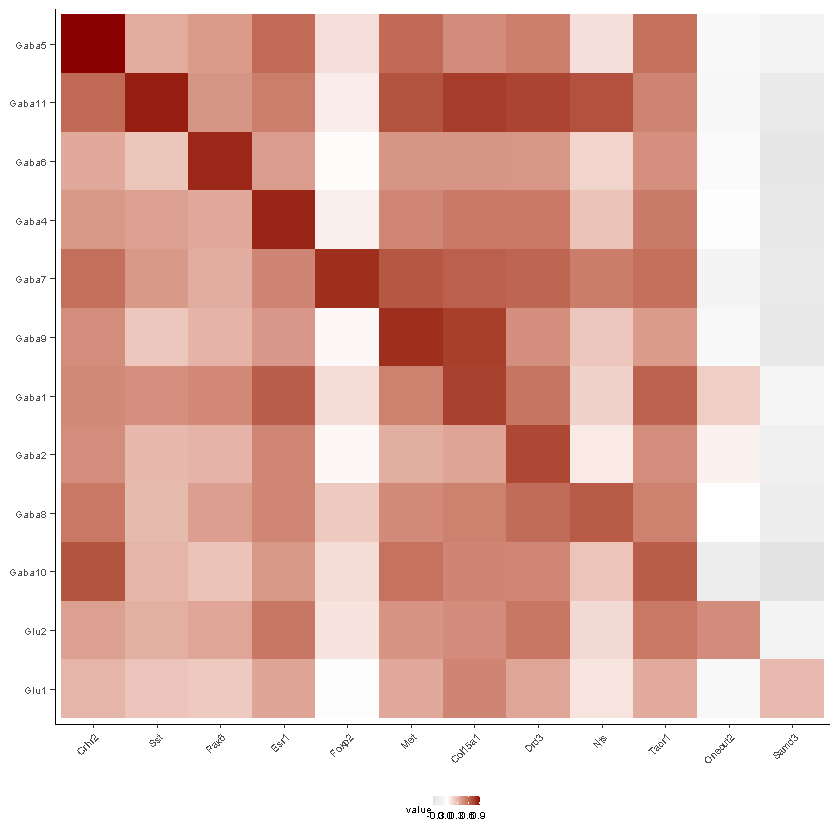

In [111]:
ggplot(cor.df.long, aes(x=Var1, y=Var2, fill=value))+
geom_tile() + scale_fill_gradient2(low='gray',mid='white',high='darkred',midpoint=0) +
theme_classic()+
    theme( axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=6,),
        axis.text.x = element_text(size=6, angle=45, hjust=1),
        axis.title = element_blank(),
        legend.position='bottom',
        legend.key.size = unit(.2, 'cm'),
        legend.title = element_text(size=6),
        legend.text = element_text(size=6)) + coord_flip()
#ggsave('C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/HCR_seq_correlation.pdf',width=3, height=3)

In [127]:
p.df <- p.2[2:13]
colnames(p.df)<-hcr.types
rownames(p.df)<-seq.types

In [128]:
p.df<-data.matrix(p.df)

In [129]:
p.df.long <-melt(p.df)

In [130]:
p.df.long

Var1,Var2,value
<fct>,<fct>,<dbl>
Gaba11,Sst,5.053117e-05
Gaba9,Sst,4.448671e-01
Gaba1,Sst,1.056064e-01
Gaba8,Sst,3.397284e-01
Gaba2,Sst,3.258039e-01
Gaba7,Sst,1.448449e-01
Gaba10,Sst,3.046101e-01
Glu1,Sst,4.233258e-01
Gaba6,Sst,4.284647e-01


In [131]:
p.df.long$Var1<-factor(p.df.long$Var1, levels=rev(c('Gaba5','Gaba11','Gaba6','Gaba4','Gaba7','Gaba9','Gaba1','Gaba2','Gaba8','Gaba10','Glu2','Glu1')))

In [132]:
p.df.long$Var2<-factor(p.df.long$Var2, levels=(c('Crhr2','Sst','Pax6','Esr1','Foxp2','Met','Col15a1','Drd3','Nts','Tacr1','Onecut2','Samd3')))

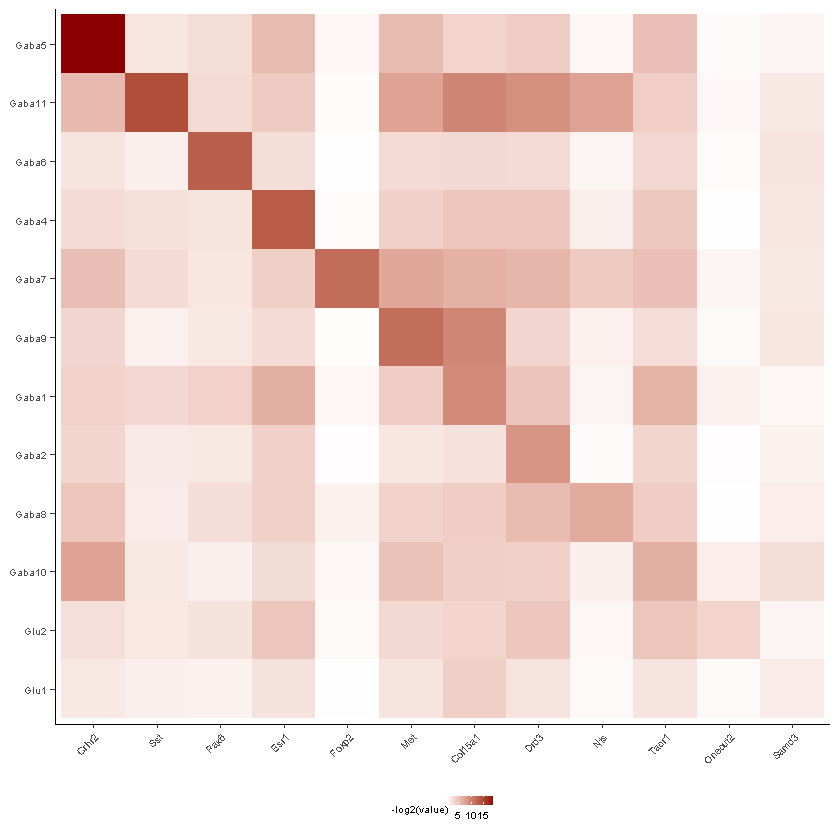

In [171]:
ggplot(p.df.long, aes(x=Var1, y=Var2, fill=-log2(value)))+
geom_tile() + scale_fill_gradient2(low='gray',mid='white',high='darkred',midpoint=0) +
theme_classic()+
    theme( axis.line=element_line(size=0.25),
        axis.ticks=element_line(size=0.25),
        axis.text.y = element_text(size=6,),
        axis.text.x = element_text(size=6, angle=45, hjust=1),
        axis.title = element_blank(),
        legend.position='bottom',
        legend.key.size = unit(.2, 'cm'),
        legend.title = element_text(size=6),
        legend.text = element_text(size=6)) + coord_flip()
ggsave('C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/HCR_seq_p-values.pdf',width=3, height=3)

In [161]:
p.df

,Sst,Met,Col15a1,Nts,Drd3,Foxp2,Tacr1,Samd3,Pax6,Crhr2,Esr1,Onecut2
Gaba11,5.053117e-05,0.0064758660,0.001172769,0.005859736,0.002267144,0.8064619884,0.07116665,0.2854332,0.1316269756,2.314582e-02,0.0585249776,0.68632287
Gaba9,4.448671e-01,0.0003040611,0.001329740,0.445973675,0.102690594,0.9304336824,0.15382778,0.2544169,0.2919895220,1.009163e-01,0.1403753902,0.72109120
Gaba1,1.056064e-01,0.0650853464,0.001573532,0.539785164,0.039223530,0.6488858535,0.01515537,0.6143134,0.0840754768,8.555583e-02,0.0120659534,0.50745816
Gaba8,3.397284e-01,0.0902075294,0.065163078,0.009648418,0.025819145,0.4607202018,0.06465922,0.3752805,0.1703912973,4.520658e-02,0.0780256105,0.95698833
Gaba2,3.258039e-01,0.2575593695,0.199087717,0.775522507,0.002835242,0.9114786155,0.09950058,0.4665735,0.2951766927,9.962526e-02,0.0773742995,0.86674029
Gaba7,1.448449e-01,0.0080900194,0.013578603,0.055065175,0.018679991,0.0002987387,0.03187336,0.2827449,0.2558674007,2.917872e-02,0.0740235661,0.59845337
Gaba10,3.046101e-01,0.0349518199,0.074861737,0.421663706,0.076781152,0.6430623930,0.01249868,0.1553252,0.4123485417,6.467090e-03,0.1466599181,0.38629814
Glu1,4.233258e-01,0.2267686687,0.074847016,0.712695946,0.214246647,0.9372234424,0.23484182,0.3426244,0.4596136182,3.081897e-01,0.2050115531,0.72844051
Gaba6,4.284647e-01,0.1318905086,0.129266695,0.556480215,0.136022924,0.9628539125,0.10775820,0.2304963,0.0001359473,2.290337e-01,0.1611162597,0.80070598
Gaba5,2.394002e-01,0.0243109645,0.096964603,0.668015458,0.059993288,0.6613604492,0.03269623,0.5650801,0.1542265761,2.122207e-06,0.0248594488,0.78067048


In [136]:
cor.df

,Sst,Met,Col15a1,Nts,Drd3,Foxp2,Tacr1,Samd3,Pax6,Crhr2,Esr1,Onecut2
Gaba11,0.8541311,0.6681689,0.7537439,0.67403952,0.7241471,0.06918328,0.4785183,-0.2952102,0.4075136,0.5809348,0.4985829,-0.11380700
Gaba9,0.2134944,0.8039147,0.7483921,0.21298787,0.4377602,0.02467833,0.3872698,-0.3139865,0.2913999,0.4397984,0.3992800,-0.10067663
Gaba1,0.4344634,0.4878170,0.7410134,0.17204981,0.5364989,0.12819499,0.6127562,-0.1417503,0.4605274,0.4585933,0.6286479,0.18574988
Gaba8,0.2650493,0.4526664,0.4876942,0.64346830,0.5721919,0.20629698,0.4884917,-0.2467638,0.3734089,0.5235004,0.4686931,-0.01524766
Gaba2,0.2725022,0.3120232,0.3513546,0.08049125,0.7132021,0.03142433,0.4414428,-0.2036705,0.2895659,0.4412973,0.4695989,0.04741536
Gaba7,0.3952071,0.6546439,0.6205166,0.50461878,0.5974356,0.80449150,0.5546737,-0.2967876,0.3130784,0.5621296,0.4743468,-0.14806618
Gaba10,0.2842047,0.5467151,0.4731449,0.22426555,0.4704285,0.13045913,0.6262446,-0.3859771,0.2286750,0.6682494,0.3935772,-0.24129145
Glu1,0.2234841,0.3319428,0.4731659,0.10382854,0.3405264,-0.02226507,0.3265656,0.2635211,0.2067954,0.2821958,0.3470626,-0.09792652
Gaba6,0.2210778,0.4072602,0.4097983,0.16511721,0.4033314,0.01316688,0.4320709,-0.3294454,0.8284248,0.3304223,0.3810544,-0.07127916
Gaba5,0.3235801,0.5770347,0.4444298,0.12080809,0.4960999,0.12336935,0.5524918,-0.1615811,0.3869247,0.9124168,0.5752477,-0.07860225
